**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate a decision tree model and a random forest model for classification tasks.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.

> **Q1.2.** Evaluate and discuss the model performance.

> **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q1.4.** Evaluate and discuss the model performance after the pruning.

> **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

> **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q1.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q1.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

### Preprocessing the Dataset

In [75]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [76]:
# the dataset we are going to be loading in is the Weather dataset. We use the pandas.
weather_df = pd.read_csv("weatherAUS.csv")
weather_df.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1    7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2   2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3    3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4    9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
5   9/28/2011       Mildura     15.7     27.3       0.0         11.2   
6  10/13/2011     Nuriootpa      9.8     23.9       0.0          4.4   
7    4/8/2010     NorahHead     18.7     27.6       3.0          NaN   
8  10/19/2009    Townsville     23.6     30.1       0.0         11.4   
9   2/23/2010  MountGambier      8.5     22.9       1.4          4.2   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       8.9          NW           30.0        WSW  ...        47.0   
1       NaN         SSW           50.0          E  ...        46.0   
2       7.2         SSE           41.0        SSE  ...        50.0   
3      11.3          SW           54.0        SSE  ...        41.0   
4       NaN         NNW           43.0        WNW  ...        67.0   
5       5.6           N           65.0        ENE  ...        86.0   
6      10.5          SE           35.0        ENE  ...        29.0   
7       NaN         SSE           41.0        WNW  ...        64.0   
8      10.8           E           57.0        ESE  ...        48.0   
9      12.5         SSW           41.0        SSE  ...        41.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1023.1       1022.2       1.0       1.0      9.1     13.3         No   
1       1001.5       1002.4       NaN       NaN      1.3     13.7         No   
2       1020.9       1021.9       6.0       4.0     22.7     24.4         No   
3       1018.3       1014.9       6.0       1.0     20.0     26.1         No   
4       1020.3       1015.0       NaN       NaN     22.2     22.6         No   
5       1002.0        995.5       8.0       7.0     18.1     18.5         No   
6       1017.8       1013.9       3.0       4.0     15.5     23.0         No   
7       1013.2       1011.0       NaN       NaN     22.4     24.0        Yes   
8       1020.9       1018.0       4.0       2.0     27.4     27.9         No   
9       1023.1       1022.1       1.0       2.0     16.4     22.1        Yes   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.2            No  
3      0.0            No  
4      0.4            No  
5      5.6           Yes  
6      0.2            No  
7      0.2            No  
8      0.0            No  
9      0.0            No  

[10 rows x 24 columns]

##### Dealing with missing values

In [77]:
# to deal with missing values, we first check and investigate each columns to see which ones contain missing value. 
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [78]:
# Dealing with missing data
# numerical variables
numerical_columns = weather_df.select_dtypes(include=['float64', 'int64'])

# Imputing numerical variables
numimputed=numerical_columns.fillna(numerical_columns.mean())
numimputed

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
0          5.1     14.3       0.0     1.800000   8.900000           30.0   
1          1.1     14.5       0.4     5.189544   7.544688           50.0   
2         19.7     26.2       0.0     7.200000   7.200000           41.0   
3         16.6     28.0       0.0     9.000000  11.300000           54.0   
4         14.6     25.3       0.0     5.189544   7.544688           43.0   
...        ...      ...       ...          ...        ...            ...   
36876     10.1     14.2       7.4     3.400000   0.000000           46.0   
36877      6.3     26.0       0.0     5.000000  10.600000           37.0   
36878     20.5     31.7       0.0     7.000000  11.100000           37.0   
36879      6.3     23.3       0.0     5.200000  11.600000           39.0   
36880      9.4     26.3       0.0     4.800000  12.200000           35.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               7.0           6.0         65.0         47.0       1023.1   
1               7.0          24.0         99.0         46.0       1001.5   
2              19.0          31.0         48.0         50.0       1020.9   
3              28.0          33.0         50.0         41.0       1018.3   
4               6.0          28.0         64.0         67.0       1020.3   
...             ...           ...          ...          ...          ...   
36876          19.0          15.0         84.0         81.0       1016.2   
36877           9.0          26.0         38.0         45.0       1024.2   
36878          20.0          13.0         54.0         39.0       1012.6   
36879           9.0          20.0         50.0         41.0       1023.9   
36880          15.0          20.0         50.0         28.0       1017.5   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0           1022.2  1.000000  1.000000      9.1     13.3      0.0  
1           1002.4  4.331488  4.462321      1.3     13.7      0.0  
2           1021.9  6.000000  4.000000     22.7     24.4      0.2  
3           1014.9  6.000000  1.000000     20.0     26.1      0.0  
4           1015.0  4.331488  4.462321     22.2     22.6      0.4  
...            ...       ...       ...      ...      ...      ...  
36876       1014.5  7.000000  8.000000     10.4     13.9      9.0  
36877       1021.5  1.000000  1.000000     18.4     23.5      0.0  
36878       1009.0  2.000000  5.000000     25.7     30.5      0.0  
36879       1019.9  0.000000  1.000000     16.4     20.9      0.0  
36880       1014.7  4.000000  4.000000     16.7     25.3      0.0  

[36881 rows x 17 columns]

In [79]:
numimputed.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [80]:
# Dealing with missing data
# numerical variables
categorical_columns = weather_df.select_dtypes(exclude=['float64', 'int64'])
# Imputation for categorical variables 
cat_imputed=categorical_columns.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_imputed

Date      Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       5/18/2009        Hobart          NW        WSW        SSE        No   
1        7/3/2009    Launceston         SSW          E         SW        No   
2       2/18/2010   Williamtown         SSE        SSE        SSE        No   
3        3/4/2010  PerthAirport          SW        SSE         SW        No   
4        9/9/2010     GoldCoast         NNW        WNW          N        No   
...           ...           ...         ...        ...        ...       ...   
36876   6/14/2011         Perth         NNE        NNE          N       Yes   
36877   9/24/2010  PerthAirport           W          N        WSW        No   
36878    5/6/2011        Darwin           E          E        ESE        No   
36879  10/12/2010         Perth         SSW          E        SSW        No   
36880  12/22/2010     Nuriootpa          SE        ENE        WSW        No   

      RainTomorrow  
0               No  
1               No  
2               No  
3               No  
4               No  
...            ...  
36876          Yes  
36877           No  
36878           No  
36879           No  
36880           No  

[36881 rows x 7 columns]

In [81]:
cat_imputed.isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [82]:
CombineData = pd.concat([numimputed, cat_imputed], axis=1)
CombineData

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
0          5.1     14.3       0.0     1.800000   8.900000           30.0   
1          1.1     14.5       0.4     5.189544   7.544688           50.0   
2         19.7     26.2       0.0     7.200000   7.200000           41.0   
3         16.6     28.0       0.0     9.000000  11.300000           54.0   
4         14.6     25.3       0.0     5.189544   7.544688           43.0   
...        ...      ...       ...          ...        ...            ...   
36876     10.1     14.2       7.4     3.400000   0.000000           46.0   
36877      6.3     26.0       0.0     5.000000  10.600000           37.0   
36878     20.5     31.7       0.0     7.000000  11.100000           37.0   
36879      6.3     23.3       0.0     5.200000  11.600000           39.0   
36880      9.4     26.3       0.0     4.800000  12.200000           35.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp9am  \
0               7.0           6.0         65.0         47.0  ...      9.1   
1               7.0          24.0         99.0         46.0  ...      1.3   
2              19.0          31.0         48.0         50.0  ...     22.7   
3              28.0          33.0         50.0         41.0  ...     20.0   
4               6.0          28.0         64.0         67.0  ...     22.2   
...             ...           ...          ...          ...  ...      ...   
36876          19.0          15.0         84.0         81.0  ...     10.4   
36877           9.0          26.0         38.0         45.0  ...     18.4   
36878          20.0          13.0         54.0         39.0  ...     25.7   
36879           9.0          20.0         50.0         41.0  ...     16.4   
36880          15.0          20.0         50.0         28.0  ...     16.7   

       Temp3pm  RISK_MM        Date      Location  WindGustDir  WindDir9am  \
0         13.3      0.0   5/18/2009        Hobart           NW         WSW   
1         13.7      0.0    7/3/2009    Launceston          SSW           E   
2         24.4      0.2   2/18/2010   Williamtown          SSE         SSE   
3         26.1      0.0    3/4/2010  PerthAirport           SW         SSE   
4         22.6      0.4    9/9/2010     GoldCoast          NNW         WNW   
...        ...      ...         ...           ...          ...         ...   
36876     13.9      9.0   6/14/2011         Perth          NNE         NNE   
36877     23.5      0.0   9/24/2010  PerthAirport            W           N   
36878     30.5      0.0    5/6/2011        Darwin            E           E   
36879     20.9      0.0  10/12/2010         Perth          SSW           E   
36880     25.3      0.0  12/22/2010     Nuriootpa           SE         ENE   

      WindDir3pm RainToday RainTomorrow  
0            SSE        No           No  
1             SW        No           No  
2            SSE        No           No  
3             SW        No           No  
4              N        No           No  
...          ...       ...          ...  
36876          N       Yes          Yes  
36877        WSW        No           No  
36878        ESE        No           No  
36879        SSW        No           No  
36880        WSW        No           No  

[36881 rows x 24 columns]

In [83]:
CombineData["RainTomorrow"].replace({'No': 0, 'Yes': 1}, inplace=True)

In [84]:
# Dealing with unnecessary data
CombineData.drop(columns=["Date", "Location"], inplace=True)

In [85]:
CombineData

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
0          5.1     14.3       0.0     1.800000   8.900000           30.0   
1          1.1     14.5       0.4     5.189544   7.544688           50.0   
2         19.7     26.2       0.0     7.200000   7.200000           41.0   
3         16.6     28.0       0.0     9.000000  11.300000           54.0   
4         14.6     25.3       0.0     5.189544   7.544688           43.0   
...        ...      ...       ...          ...        ...            ...   
36876     10.1     14.2       7.4     3.400000   0.000000           46.0   
36877      6.3     26.0       0.0     5.000000  10.600000           37.0   
36878     20.5     31.7       0.0     7.000000  11.100000           37.0   
36879      6.3     23.3       0.0     5.200000  11.600000           39.0   
36880      9.4     26.3       0.0     4.800000  12.200000           35.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0               7.0           6.0         65.0         47.0  ...  1.000000   
1               7.0          24.0         99.0         46.0  ...  4.331488   
2              19.0          31.0         48.0         50.0  ...  6.000000   
3              28.0          33.0         50.0         41.0  ...  6.000000   
4               6.0          28.0         64.0         67.0  ...  4.331488   
...             ...           ...          ...          ...  ...       ...   
36876          19.0          15.0         84.0         81.0  ...  7.000000   
36877           9.0          26.0         38.0         45.0  ...  1.000000   
36878          20.0          13.0         54.0         39.0  ...  2.000000   
36879           9.0          20.0         50.0         41.0  ...  0.000000   
36880          15.0          20.0         50.0         28.0  ...  4.000000   

       Cloud3pm  Temp9am  Temp3pm  RISK_MM  WindGustDir  WindDir9am  \
0      1.000000      9.1     13.3      0.0           NW         WSW   
1      4.462321      1.3     13.7      0.0          SSW           E   
2      4.000000     22.7     24.4      0.2          SSE         SSE   
3      1.000000     20.0     26.1      0.0           SW         SSE   
4      4.462321     22.2     22.6      0.4          NNW         WNW   
...         ...      ...      ...      ...          ...         ...   
36876  8.000000     10.4     13.9      9.0          NNE         NNE   
36877  1.000000     18.4     23.5      0.0            W           N   
36878  5.000000     25.7     30.5      0.0            E           E   
36879  1.000000     16.4     20.9      0.0          SSW           E   
36880  4.000000     16.7     25.3      0.0           SE         ENE   

      WindDir3pm RainToday RainTomorrow  
0            SSE        No            0  
1             SW        No            0  
2            SSE        No            0  
3             SW        No            0  
4              N        No            0  
...          ...       ...          ...  
36876          N       Yes            1  
36877        WSW        No            0  
36878        ESE        No            0  
36879        SSW        No            0  
36880        WSW        No            0  

[36881 rows x 22 columns]

In [86]:
#Dealing with inconsistent data, we use the describe function
categorical_columns = CombineData.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = CombineData[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in WindGustDir: ['NW' 'SSW' 'SSE' 'SW' 'NNW' 'N' 'SE' 'E' 'S' 'WSW' 'W' 'NE' 'NNE' 'WNW'
 'ESE' 'ENE']
Unique values in WindDir9am: ['WSW' 'E' 'SSE' 'WNW' 'ENE' 'ESE' 'NW' 'N' 'NE' 'SE' 'NNW' 'W' 'NNE' 'S'
 'SW' 'SSW']
Unique values in WindDir3pm: ['SSE' 'SW' 'N' 'NNE' 'S' 'E' 'W' 'SE' 'NW' 'ESE' 'NE' 'ENE' 'WSW' 'WNW'
 'SSW' 'NNW']
Unique values in RainToday: ['No' 'Yes']


In [87]:
rain_t = CombineData['RainTomorrow']
for_viz = pd.concat([numimputed, rain_t], axis=1)

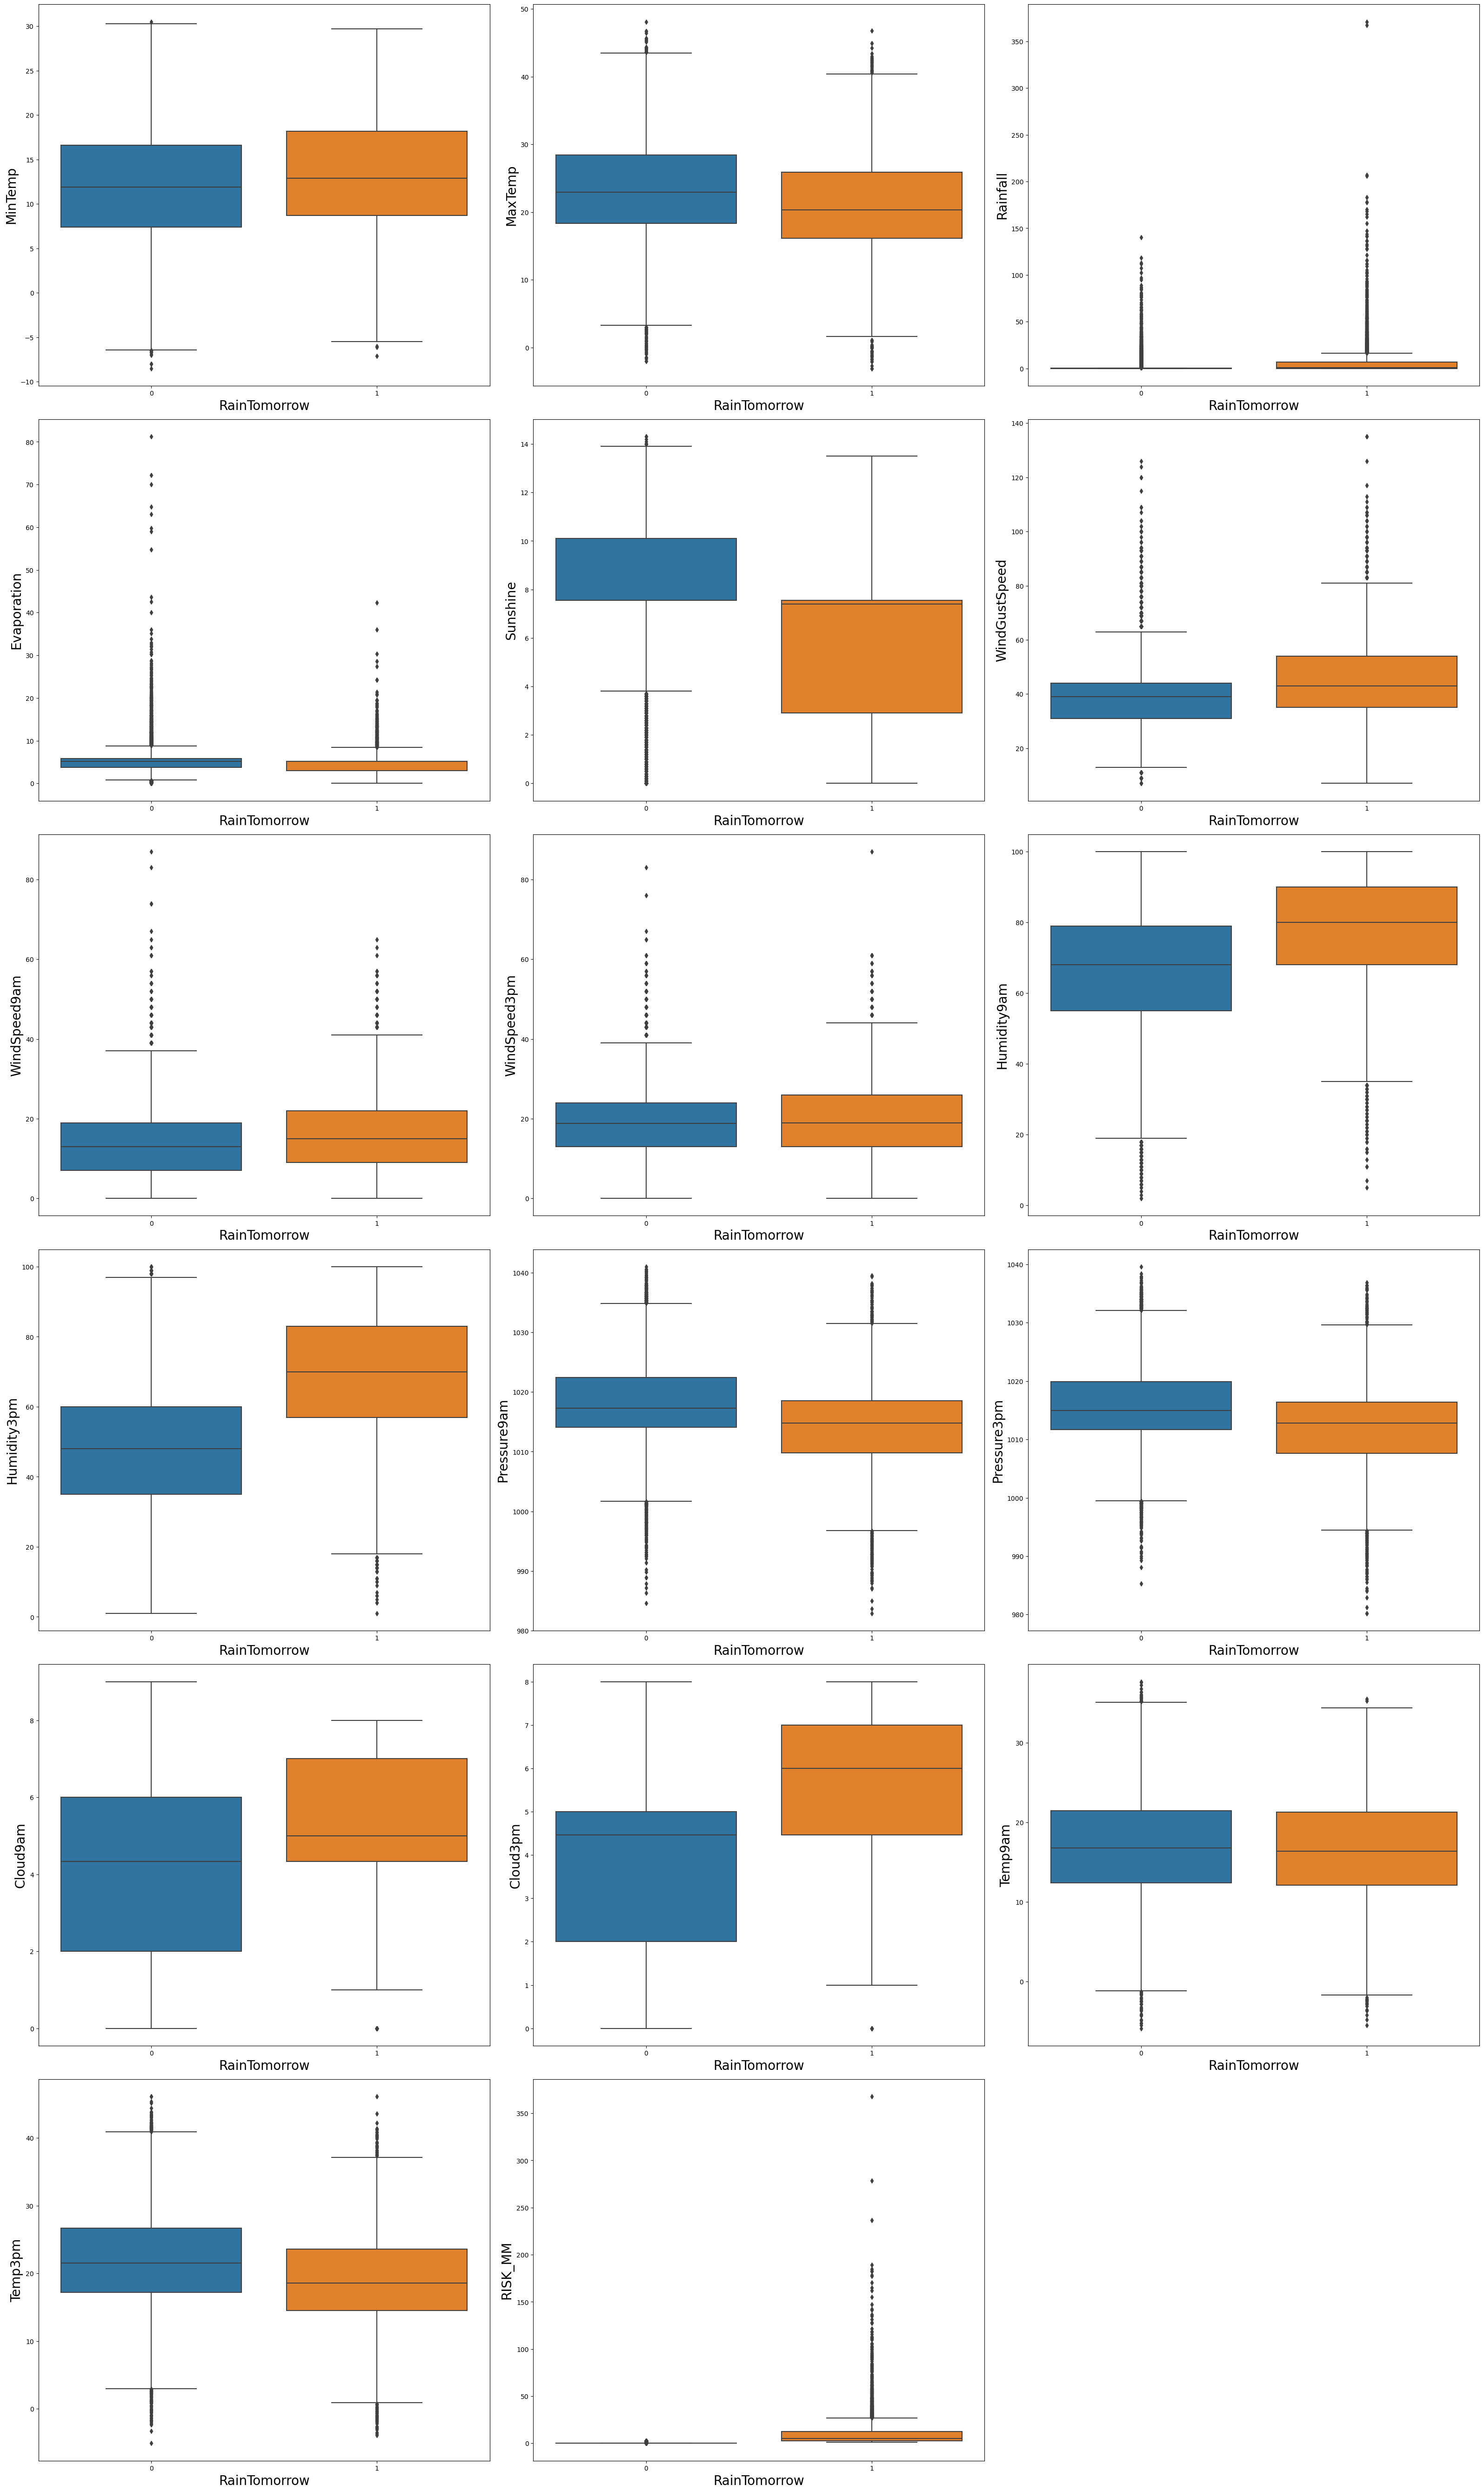

In [88]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=for_viz, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

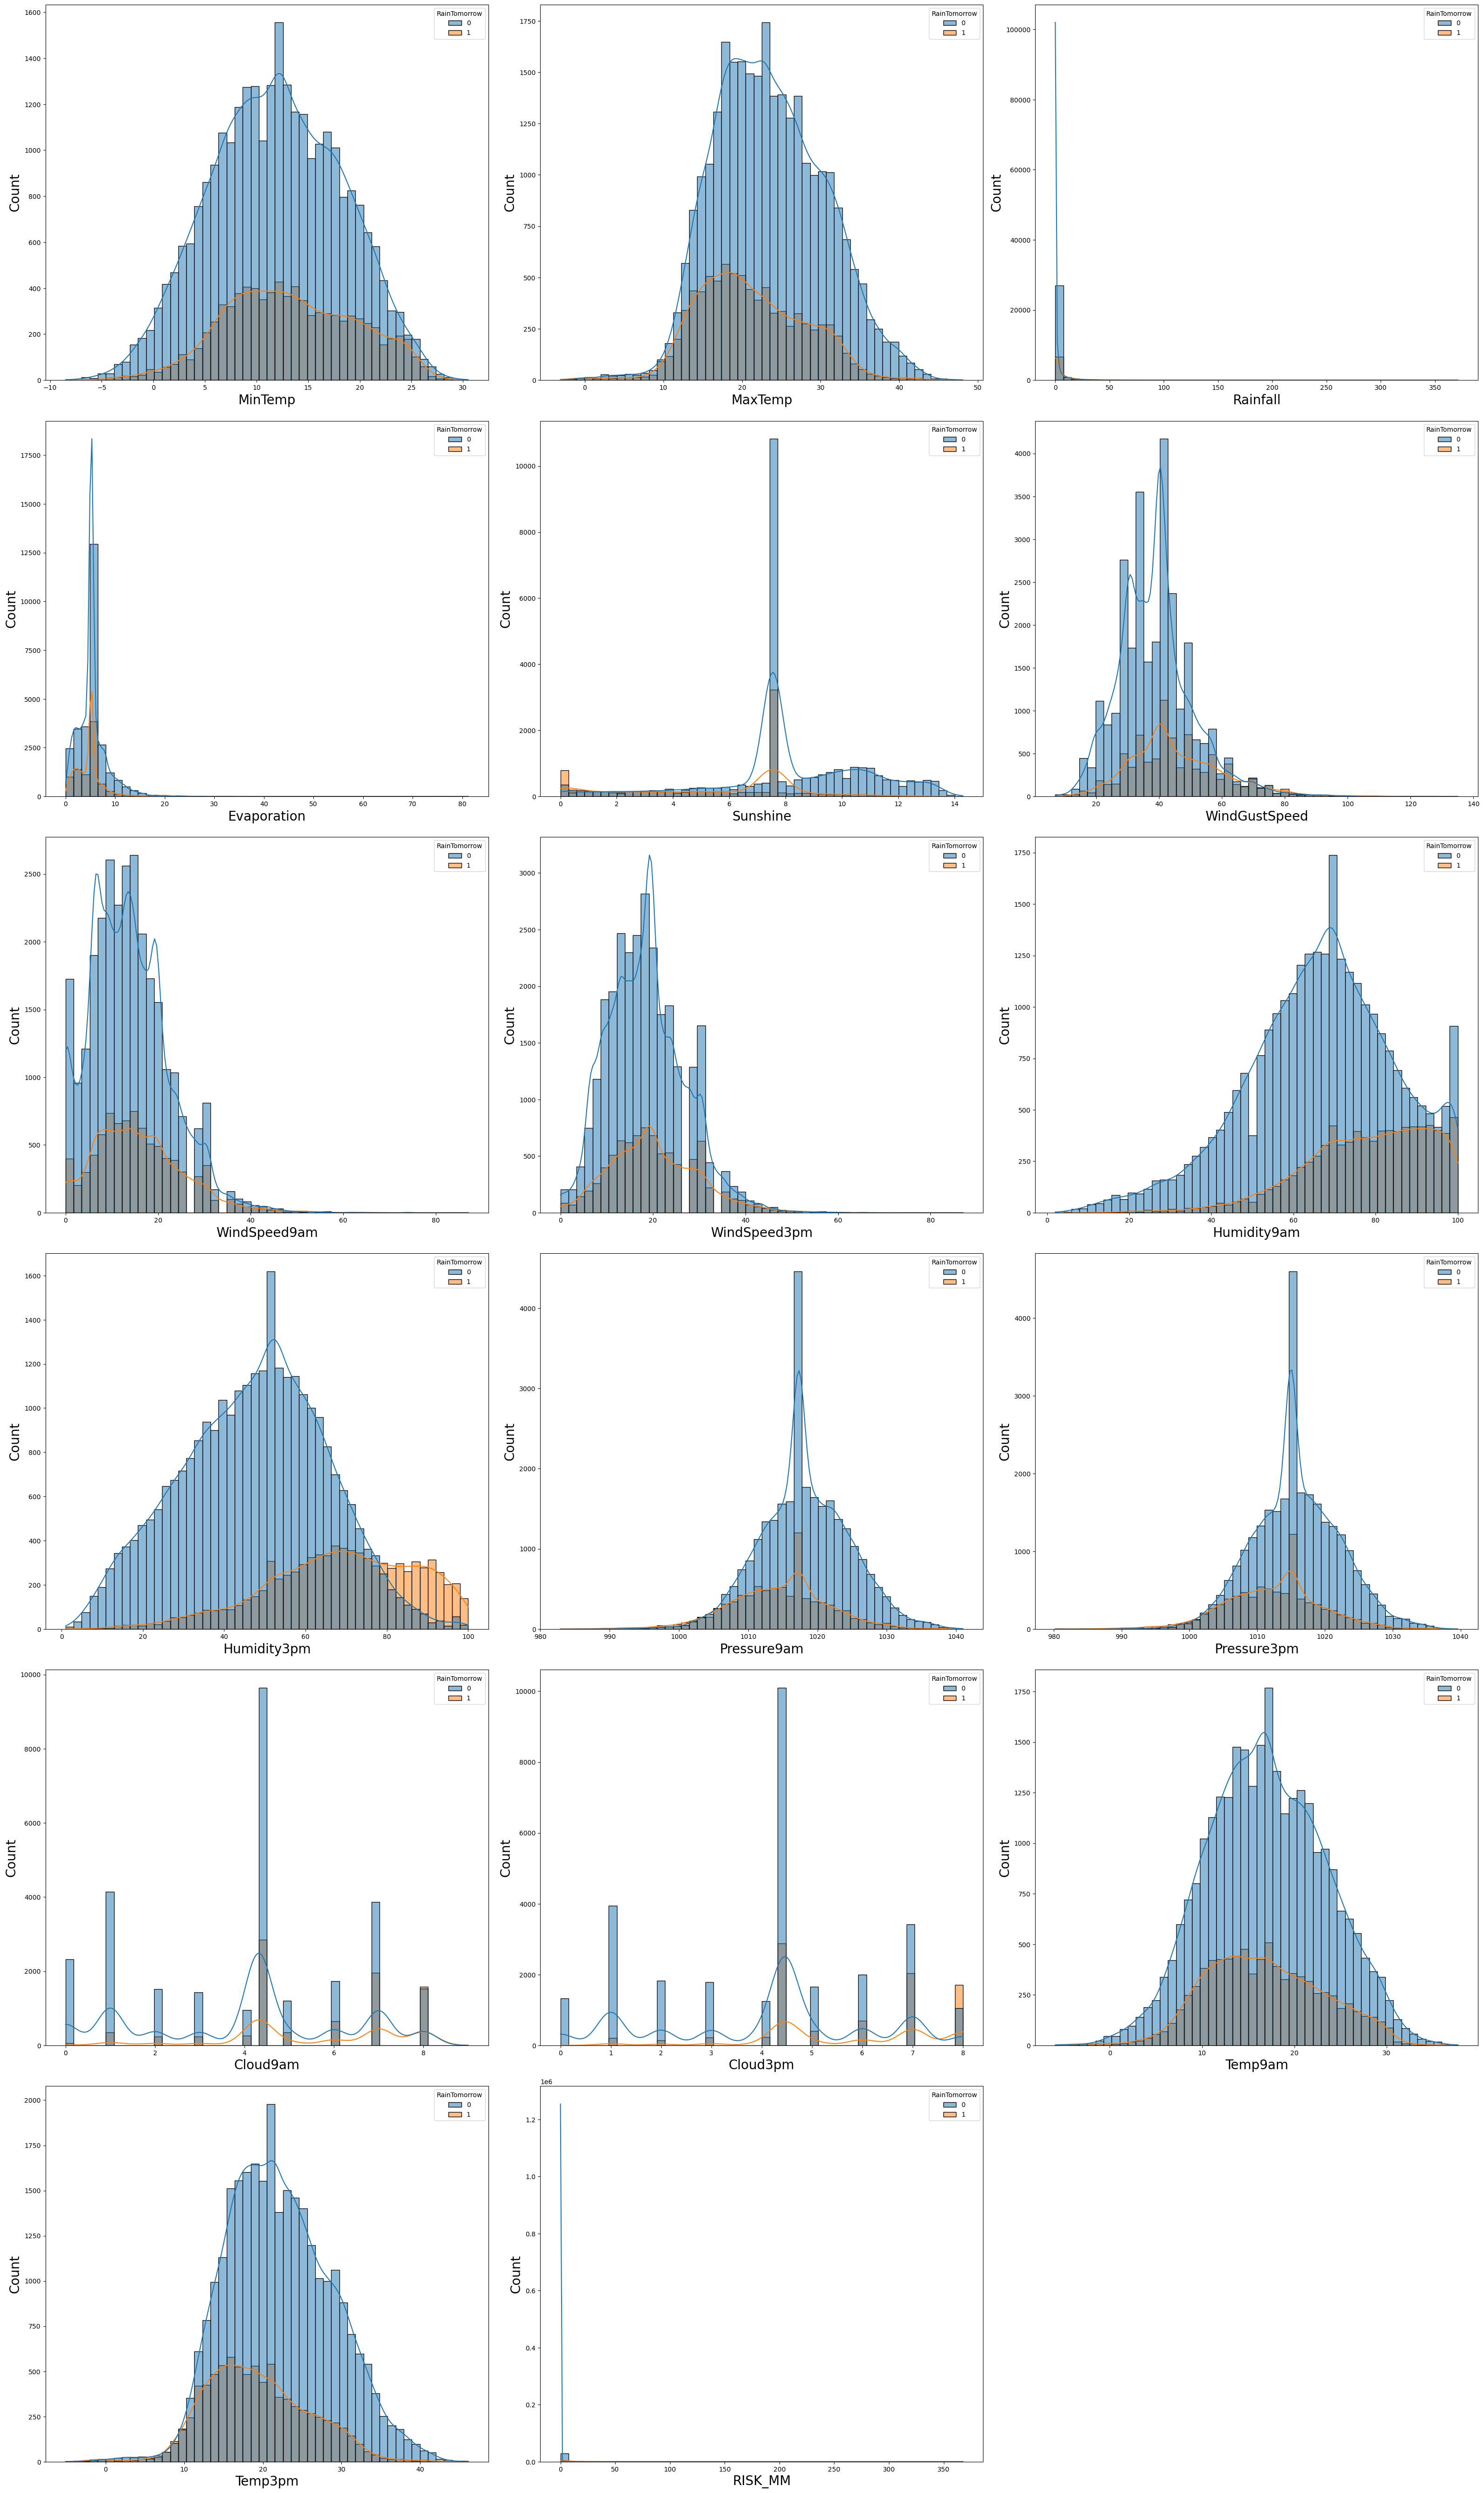

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert X array to DataFrame
#X_df = pd.DataFrame(X)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(for_viz, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()


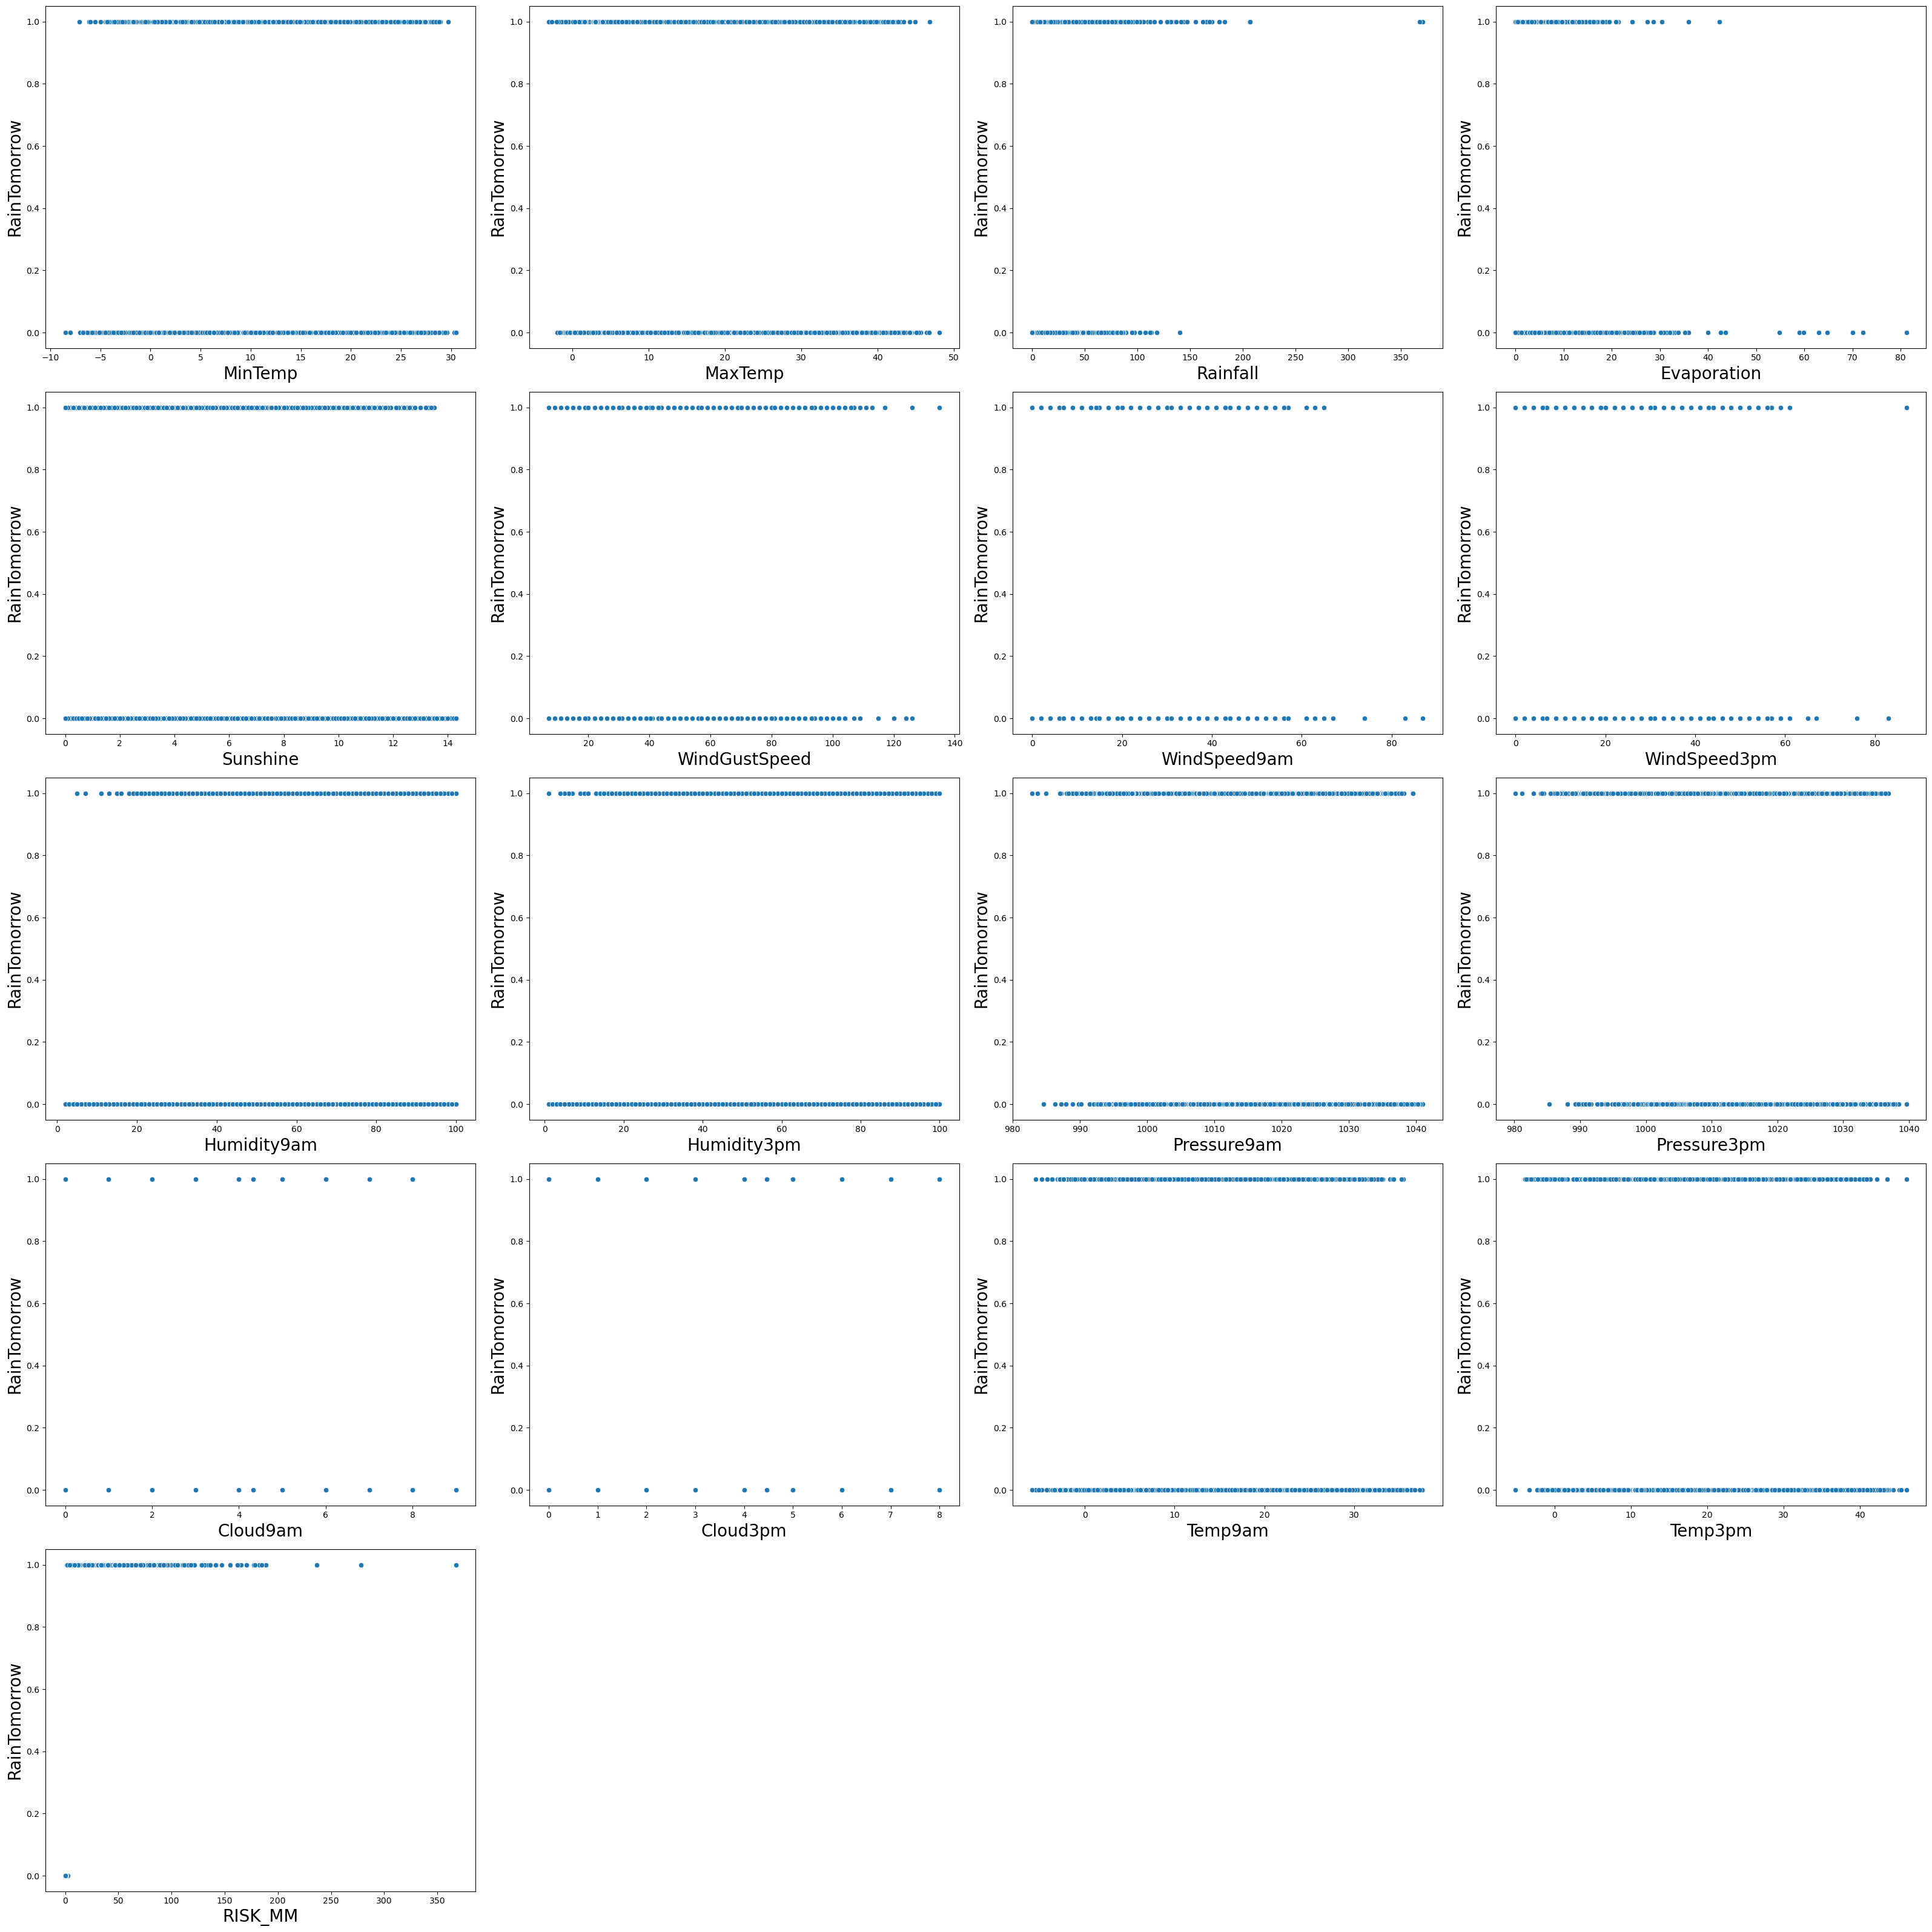

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 32))

num_cols = 4
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=for_viz, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()

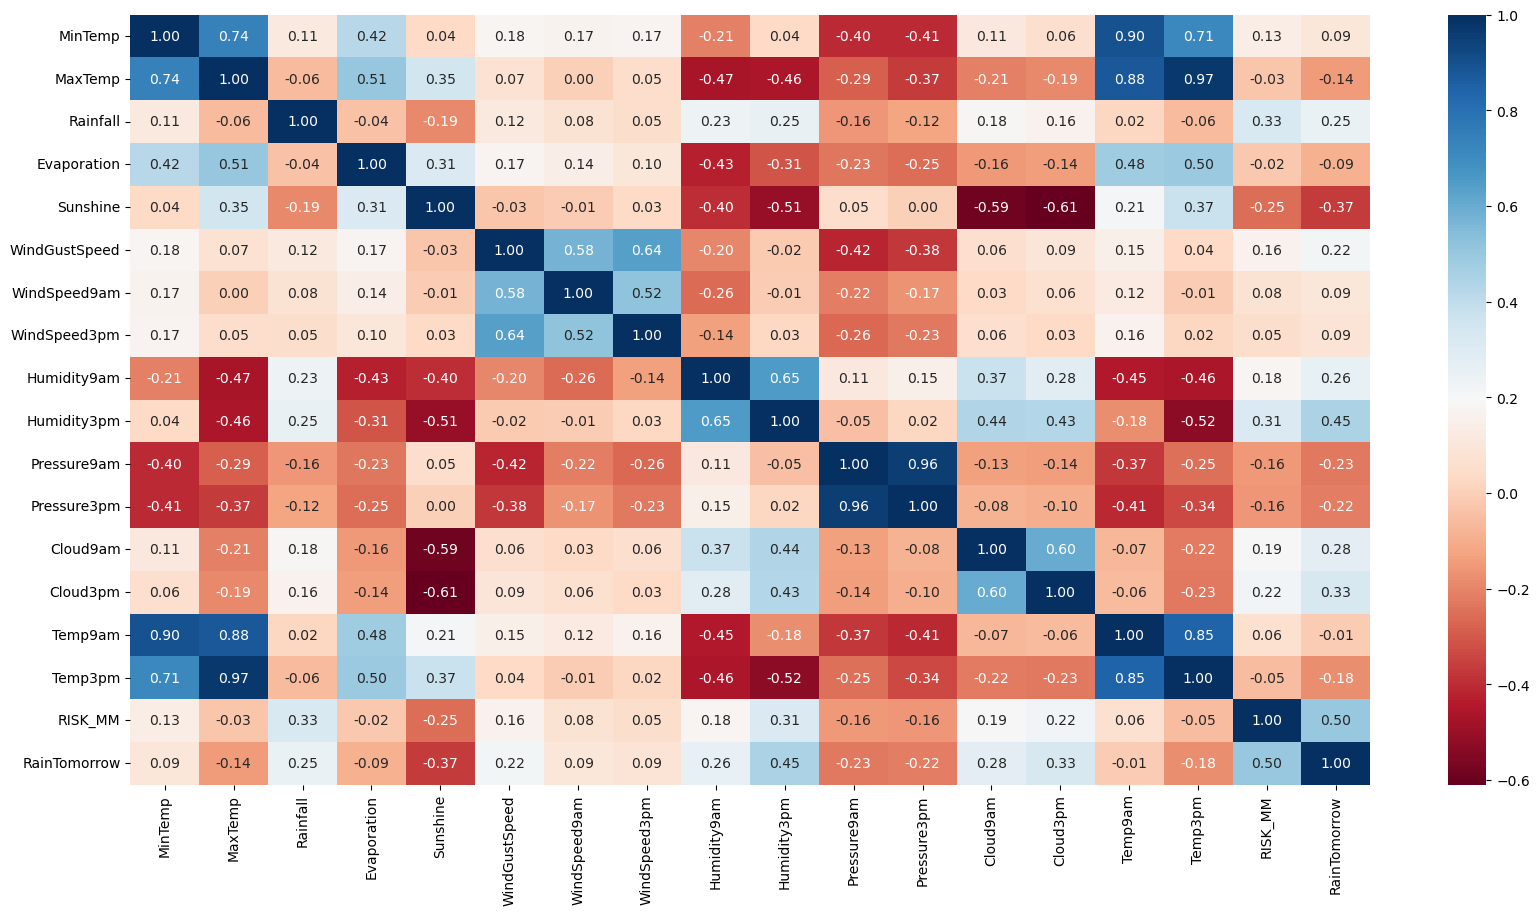

In [154]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(for_viz.corr(), cmap='RdBu', annot=True, fmt=".2f");

In [90]:
CombineData = pd.get_dummies(CombineData, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [92]:
X = CombineData.drop((["RainTomorrow", "RISK_MM"]), axis=1)
y = CombineData['RainTomorrow'].values

### Q.1.1 Building a classification model using Decision Tree

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train.shape

(29504, 66)

In [95]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5925140928472802, 0.984375, 'Humidity3pm <= 69.5\ngini = 0.355\nsamples = 29504\nvalue = [22705, 6799]\nclass = No RainTomorrow'),
 Text(0.3028900503220373, 0.953125, 'Sunshine <= 6.95\ngini = 0.242\nsamples = 23617\nvalue = [20295, 3322]\nclass = No RainTomorrow'),
 Text(0.10233909648825101, 0.921875, 'Pressure3pm <= 1013.55\ngini = 0.424\nsamples = 4398\nvalue = [3054, 1344]\nclass = No RainTomorrow'),
 Text(0.03543276345320588, 0.890625, 'Pressure3pm <= 1005.85\ngini = 0.494\nsamples = 1833\nvalue = [1018, 815]\nclass = No RainTomorrow'),
 Text(0.005942088756768021, 0.859375, 'Humidity3pm <= 26.5\ngini = 0.484\nsamples = 498\nvalue = [204, 294]\nclass = Yes RainTomorrow'),
 Text(0.0013722821125237829, 0.828125, 'Sunshine <= 0.6\ngini = 0.399\nsamples = 40\nvalue = [29, 11]\nclass = No RainTomorrow'),
 Text(0.0010292115843928372, 0.796875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes RainTomorrow'),
 Text(0.0017153526406547288, 0.796875, 'Evaporation <= 13.3\ngini = 

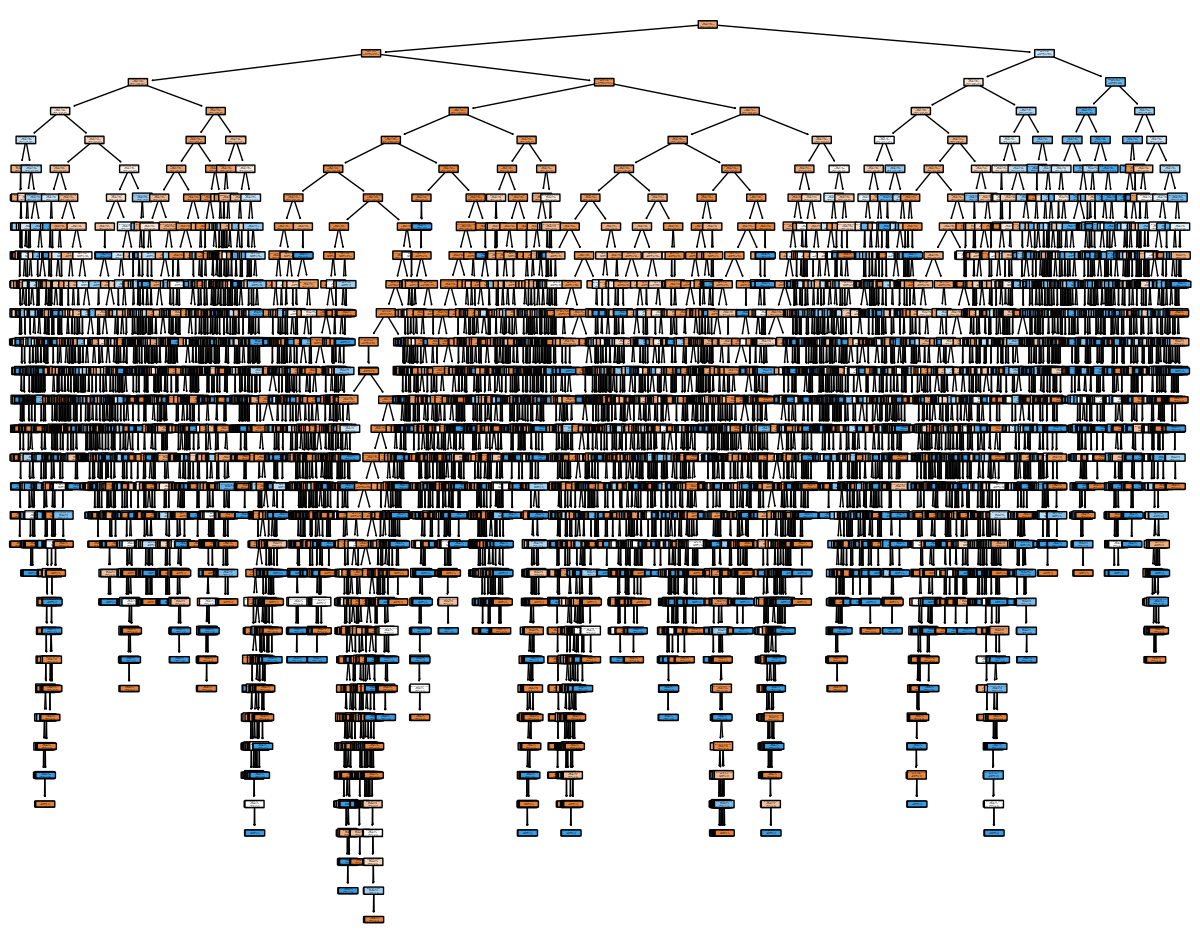

In [97]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No RainTomorrow", "Yes RainTomorrow"], 
          feature_names=X.columns.tolist())  # Convert Index to list


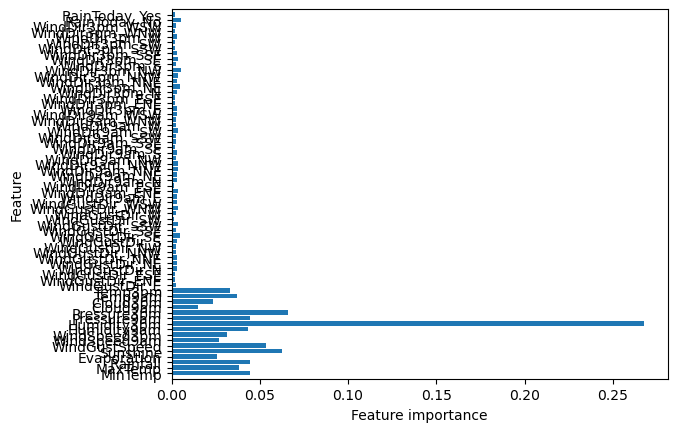

In [98]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

In [99]:
y_pred = clf_dt.predict(X_test)

In [100]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [101]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Q.1.2 Evaluating and discussing the model performance

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7787718584790565

The provided accuracy score of approximately 0.7788 indicates that the model's predictions are accurate for about 77.88% of the samples in the test set. So this means that the model correctly identifies if it is going to rain or not, approximately 78% of the time

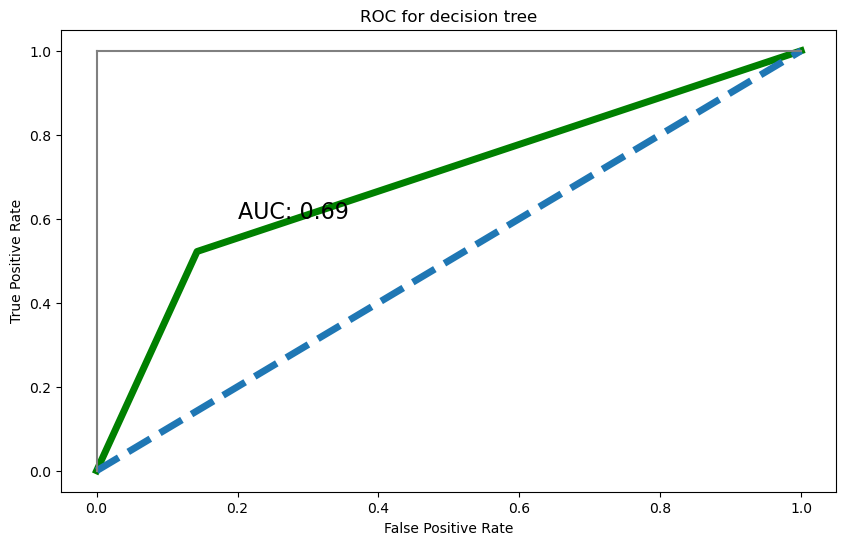

In [103]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6897058748263695

The output above shows the ROC AUC score, and it is approximately 0.6897, which indicates that the model's ability to distinguish between the positive and negative classes is moderate. A score of 0.5 represents random guessing, while higher scores indicate better model performance. Therefore, with a score of 0.6897, the model performs better than random guessing but might still have room for improvement in distinguishing between the classes.

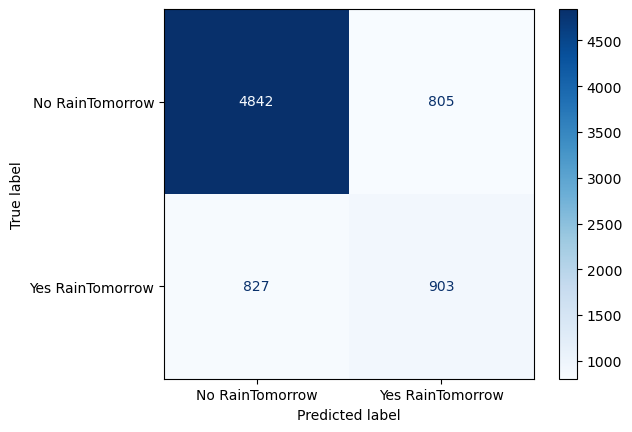

In [105]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No RainTomorrow', 'Yes RainTomorrow'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5647
           1       0.53      0.52      0.53      1730

    accuracy                           0.78      7377
   macro avg       0.69      0.69      0.69      7377
weighted avg       0.78      0.78      0.78      7377



Precision: For No Tomorrow, the precision is 0.85, indicating that 85% of the predicted positives are true positives. For Yes Tomorrow, the precision is 0.53, indicating that 53% of the predicted positives are true positives.

Recall: For No Tomorrow, the recall is 0.86, indicating that 86% of actual positives are correctly identified. For Yes Tomorrow, the recall is 0.52, indicating that 52% of actual positives are correctly identified.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. For No Tomorrow, the F1-score is 0.86, and for Yes Tomorrow, it is 0.53.

Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the overall accuracy is 0.78, indicating that the model predicts the correct class for 78% of the samples.

## Q1.3. Using the Cost Complexity Pruning method to prune the decision tree to avoid overfitting.

In [107]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

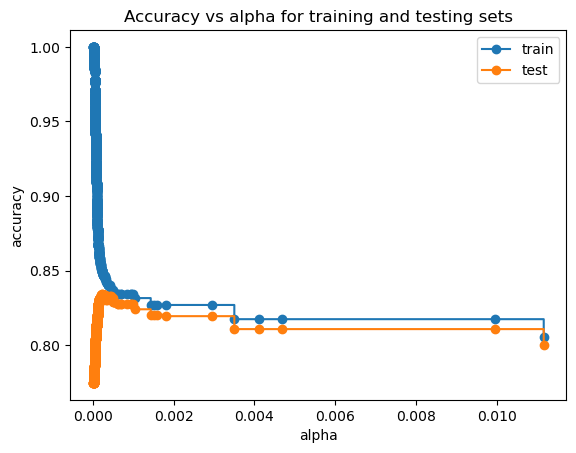

In [108]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

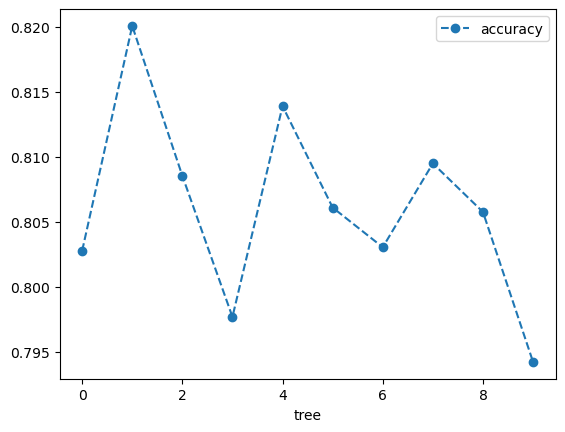

In [109]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

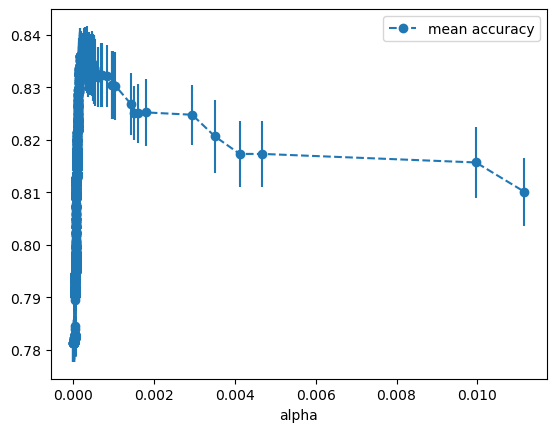

In [110]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [111]:
alpha_results['mean accuracy'].max()

0.8365304033680051

In [112]:
alpha_results['mean accuracy'].idxmax()

1547

In [113]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0002885427456030664

In [114]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5714285714285714, 0.9444444444444444, 'Humidity3pm <= 69.5\ngini = 0.355\nsamples = 29504\nvalue = [22705, 6799]\nclass = No RainTomorrow'),
 Text(0.32792207792207795, 0.8333333333333334, 'Sunshine <= 6.95\ngini = 0.242\nsamples = 23617\nvalue = [20295, 3322]\nclass = No RainTomorrow'),
 Text(0.18506493506493507, 0.7222222222222222, 'Pressure3pm <= 1013.55\ngini = 0.424\nsamples = 4398\nvalue = [3054, 1344]\nclass = No RainTomorrow'),
 Text(0.08441558441558442, 0.6111111111111112, 'Pressure3pm <= 1005.85\ngini = 0.494\nsamples = 1833\nvalue = [1018, 815]\nclass = No RainTomorrow'),
 Text(0.025974025974025976, 0.5, 'Humidity3pm <= 26.5\ngini = 0.484\nsamples = 498\nvalue = [204, 294]\nclass = Yes RainTomorrow'),
 Text(0.012987012987012988, 0.3888888888888889, 'gini = 0.399\nsamples = 40\nvalue = [29, 11]\nclass = No RainTomorrow'),
 Text(0.03896103896103896, 0.3888888888888889, 'WindGustSpeed <= 39.695\ngini = 0.472\nsamples = 458\nvalue = [175, 283]\nclass = Yes RainTomorrow'),

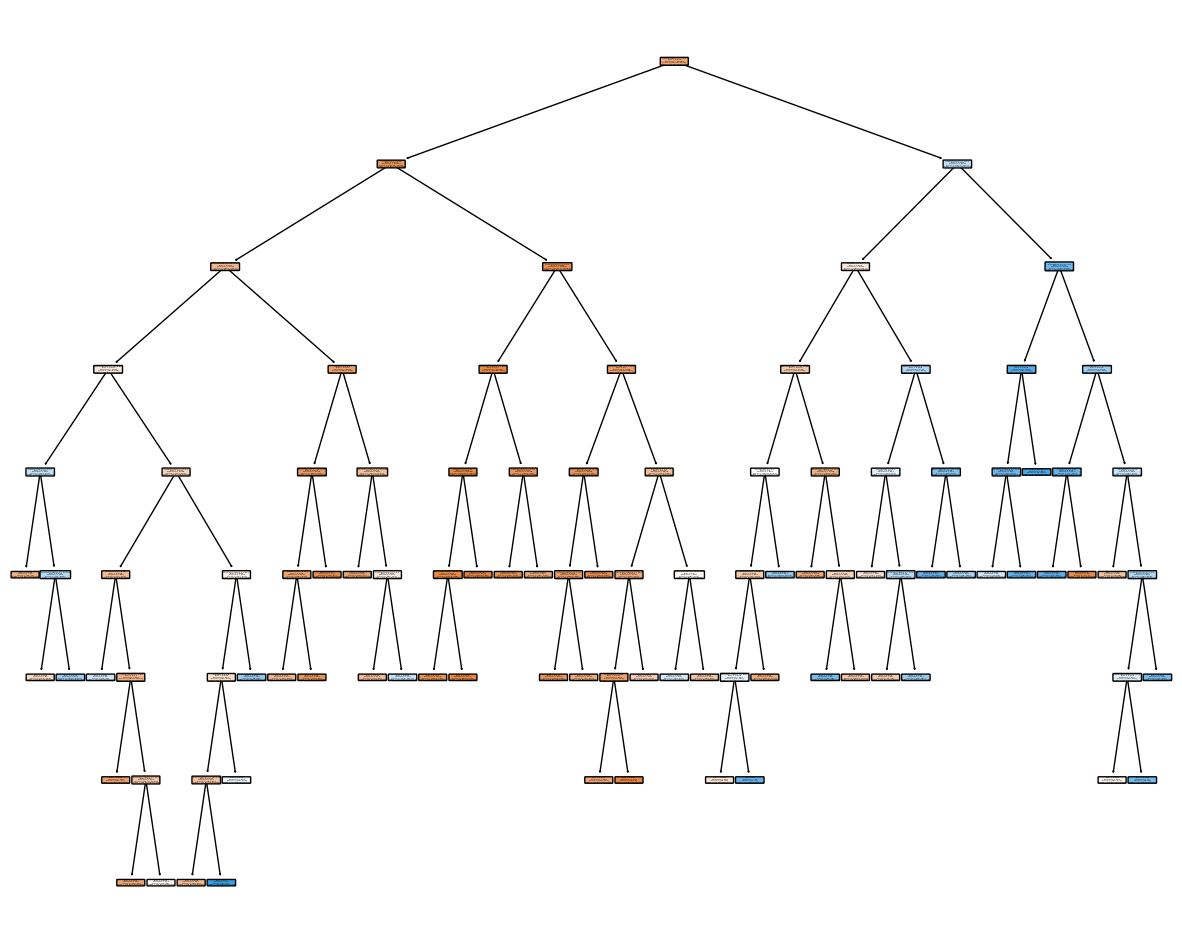

In [115]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No RainTomorrow", "Yes RainTomorrow"], 
          feature_names=X.columns.tolist())  # Convert Index to list


## Q1.4. Evaluating and discussing the model performance after the pruning.

In [116]:
y_pred = clf_dt.predict(X_test)

In [118]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [119]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8336722244814966

The provided accuracy score of approximately 0.834 indicates that the model's predictions are accurate for about 83.4% of the samples in the test set. So this means that the model correctly identifies the species of penguins in the test data approximately 83% of the time

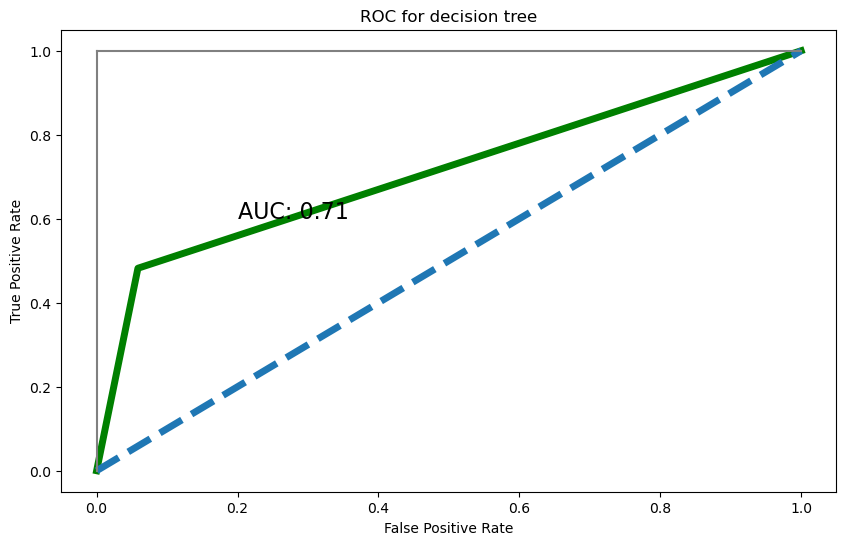

In [121]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7117328654736107

The output above shows the ROC AUC score after pruning, and it is approximately 0.7112 which is slighlty better than the result before we pruned, and it also indicates that the model's ability to distinguish between the positive and negative classes is moderate. A score of 0.7112 tells us that the model performs better than before we had pruned.

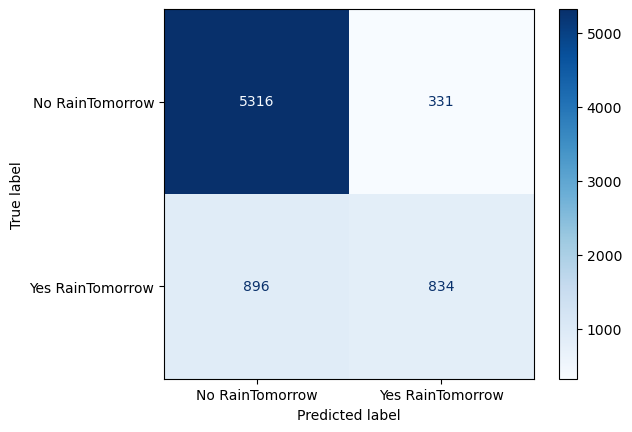

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No RainTomorrow', 'Yes RainTomorrow'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5647
           1       0.72      0.48      0.58      1730

    accuracy                           0.83      7377
   macro avg       0.79      0.71      0.74      7377
weighted avg       0.82      0.83      0.82      7377



After we prunned there seems to be a bit of an improvement.
The precision for No Tomorrow, is  now 0.86, indicating that 86% of the predicted positives are true positives. For Yes Tomorrow, the precision is 0.72, indicating that 72% of the predicted positives are true positives.

Recall: For No Tomorrow, the recall is 0.94, indicating that 94% of actual positives are correctly identified. For Yes Tomorrow, the recall is 0.48, indicating that 48% of actual positives are correctly identified, which is lower than beofre we pruned.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. For No Tomorrow, the F1-score is 0.90, and for Yes Tomorrow, it is 0.58.

Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the overall accuracy is 0.78, indicating that the model predicts the correct class for 83% of the samples.

### Q.1.5 Building a classification model using Random Forests to predict the target variable RainTomorrow from the dataset

In [126]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

### Q.1.6 Evaluating and discussing the model performance in contrast to the previous models (before and after the pruning).

In [127]:
y_pred = clf_rf.predict(X_test)

In [128]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [129]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8476345397858208

The provided accuracy score of approximately 0.8476 indicates that the model's predictions are accurate for about 85% of the samples in the test set. So this means that the model correctly identifies the species of penguins in the test data approximately 85% of the time. This is an improvement comparing it to when we used Decision Tree

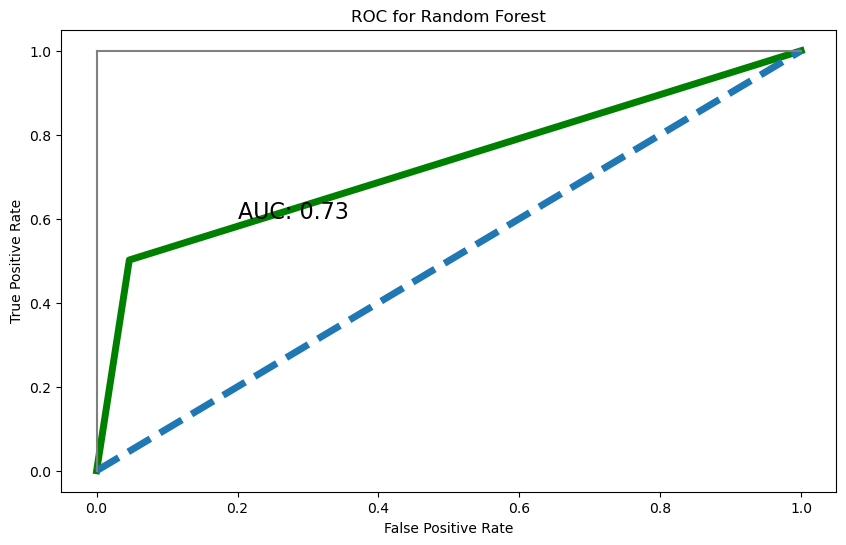

In [135]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [132]:
roc_auc_score(y_test, y_pred)

0.7276688937089721

The output above shows the ROC AUC score, and it is approximately 0.73, this also shows an improvement when we compare with our RUC AUC score which we got when we used the Decision tree approach

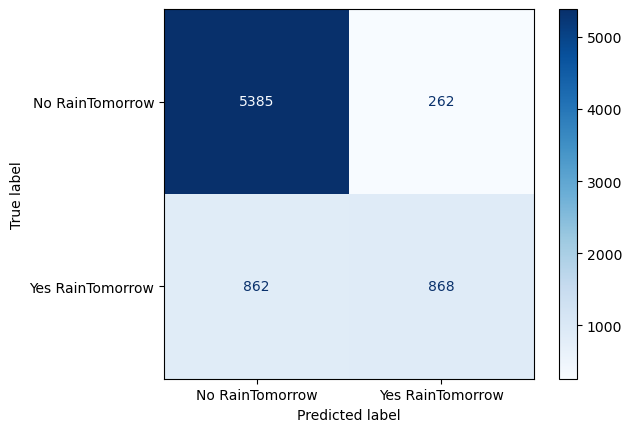

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm2 = confusion_matrix(y_test, clf_rf.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['No RainTomorrow', 'Yes RainTomorrow'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5647
           1       0.77      0.50      0.61      1730

    accuracy                           0.85      7377
   macro avg       0.82      0.73      0.76      7377
weighted avg       0.84      0.85      0.84      7377



There is also an overall improvement here, as opposed to what we got in the earlier approach. Let take for instance our Recall for Yes Rain Tomorrow, there is an evident increase of like 0.2

### Q1.7. Comparing the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab.

After comparing my results which i got in my Lab 2, when i used Logistic regression, I noticed that the logistic regression generally has high accuracy, precision, and recall values, indicating good performance overall compared to Decision Tree and Random Forest. Also, the decision tree has lower accuracy compared to logistic regression, but precision and recall values vary across classes. For the Random Forest, there is kind of a show of improvement over the decision tree in terms of accuracy and ROC AUC score. 

### Q1.8. Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

I think that I would the Random Forest model is recommended for this classification problem due to its higher accuracy (higher than Decision Forest), robustness against overfitting, strong discrimination ability (as indicated by the ROC AUC score), and overall balanced performance across various evaluation metrics. It outperforms Decision Tree models in terms of accuracy and shows improvement over the Decision Tree model in terms of discrimination ability. Therefore, considering its superior performance and versatility, the Random Forest model is the preferred choice for this classification task.

# Question 2: Multi-Class Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q2.1.** Build a classification model using Decision Trees to predict the target variable `species` from the dataset.

> **Q2.2.** Evaluate and discuss the model performance.

> **Q2.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q2.4.** Evaluate and discuss the model performance after the pruning.

> **Q2.5.** Build a classification model using Random Forests to predict the target variable `species` from the dataset.

> **Q2.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q2.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q2.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [139]:
# the dataset we are going to be loading in is the Weather dataset. We use the pandas.
penguins = pd.read_csv("penguins.csv")
penguins.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       3625.0  FEMALE  
7       4675.0    MALE  
8       3475.0     NaN  
9       4250.0     NaN

In [140]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [141]:
# Dealing with missing data
# numerical variables
penguins_numerical = penguins.select_dtypes(include=['float64', 'int64'])
penguins_numerical=penguins_numerical.fillna(penguins_numerical.mean())
penguins_numerical

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          39.10000       18.70000         181.000000  3750.000000
1          39.50000       17.40000         186.000000  3800.000000
2          40.30000       18.00000         195.000000  3250.000000
3          43.92193       17.15117         200.915205  4201.754386
4          36.70000       19.30000         193.000000  3450.000000
..              ...            ...                ...          ...
339        43.92193       17.15117         200.915205  4201.754386
340        46.80000       14.30000         215.000000  4850.000000
341        50.40000       15.70000         222.000000  5750.000000
342        45.20000       14.80000         212.000000  5200.000000
343        49.90000       16.10000         213.000000  5400.000000

[344 rows x 4 columns]

In [142]:
# Dealing with missing data
# numerical variables
penguins_categorical = penguins.select_dtypes(exclude=['float64', 'int64'])
penguins_categorical=penguins_categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
penguins_categorical

species     island     sex
0    Adelie  Torgersen    MALE
1    Adelie  Torgersen  FEMALE
2    Adelie  Torgersen  FEMALE
3    Adelie  Torgersen    MALE
4    Adelie  Torgersen  FEMALE
..      ...        ...     ...
339  Gentoo     Biscoe    MALE
340  Gentoo     Biscoe  FEMALE
341  Gentoo     Biscoe    MALE
342  Gentoo     Biscoe  FEMALE
343  Gentoo     Biscoe    MALE

[344 rows x 3 columns]

In [143]:
NewPenguins = pd.concat([penguins_numerical, penguins_categorical], axis=1)
NewPenguins

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0          39.10000       18.70000         181.000000  3750.000000  Adelie   
1          39.50000       17.40000         186.000000  3800.000000  Adelie   
2          40.30000       18.00000         195.000000  3250.000000  Adelie   
3          43.92193       17.15117         200.915205  4201.754386  Adelie   
4          36.70000       19.30000         193.000000  3450.000000  Adelie   
..              ...            ...                ...          ...     ...   
339        43.92193       17.15117         200.915205  4201.754386  Gentoo   
340        46.80000       14.30000         215.000000  4850.000000  Gentoo   
341        50.40000       15.70000         222.000000  5750.000000  Gentoo   
342        45.20000       14.80000         212.000000  5200.000000  Gentoo   
343        49.90000       16.10000         213.000000  5400.000000  Gentoo   

        island     sex  
0    Torgersen    MALE  
1    Torgersen  FEMALE  
2    Torgersen  FEMALE  
3    Torgersen    MALE  
4    Torgersen  FEMALE  
..         ...     ...  
339     Biscoe    MALE  
340     Biscoe  FEMALE  
341     Biscoe    MALE  
342     Biscoe  FEMALE  
343     Biscoe    MALE  

[344 rows x 7 columns]

In [144]:
# Dealing with unnecessary data (dropping the 'sex' column)
NewPenguins.drop(columns=['sex'], inplace=True)

In [145]:
penguins_specie = NewPenguins['species']
for_viz2 = pd.concat([penguins_numerical, penguins_specie], axis=1)

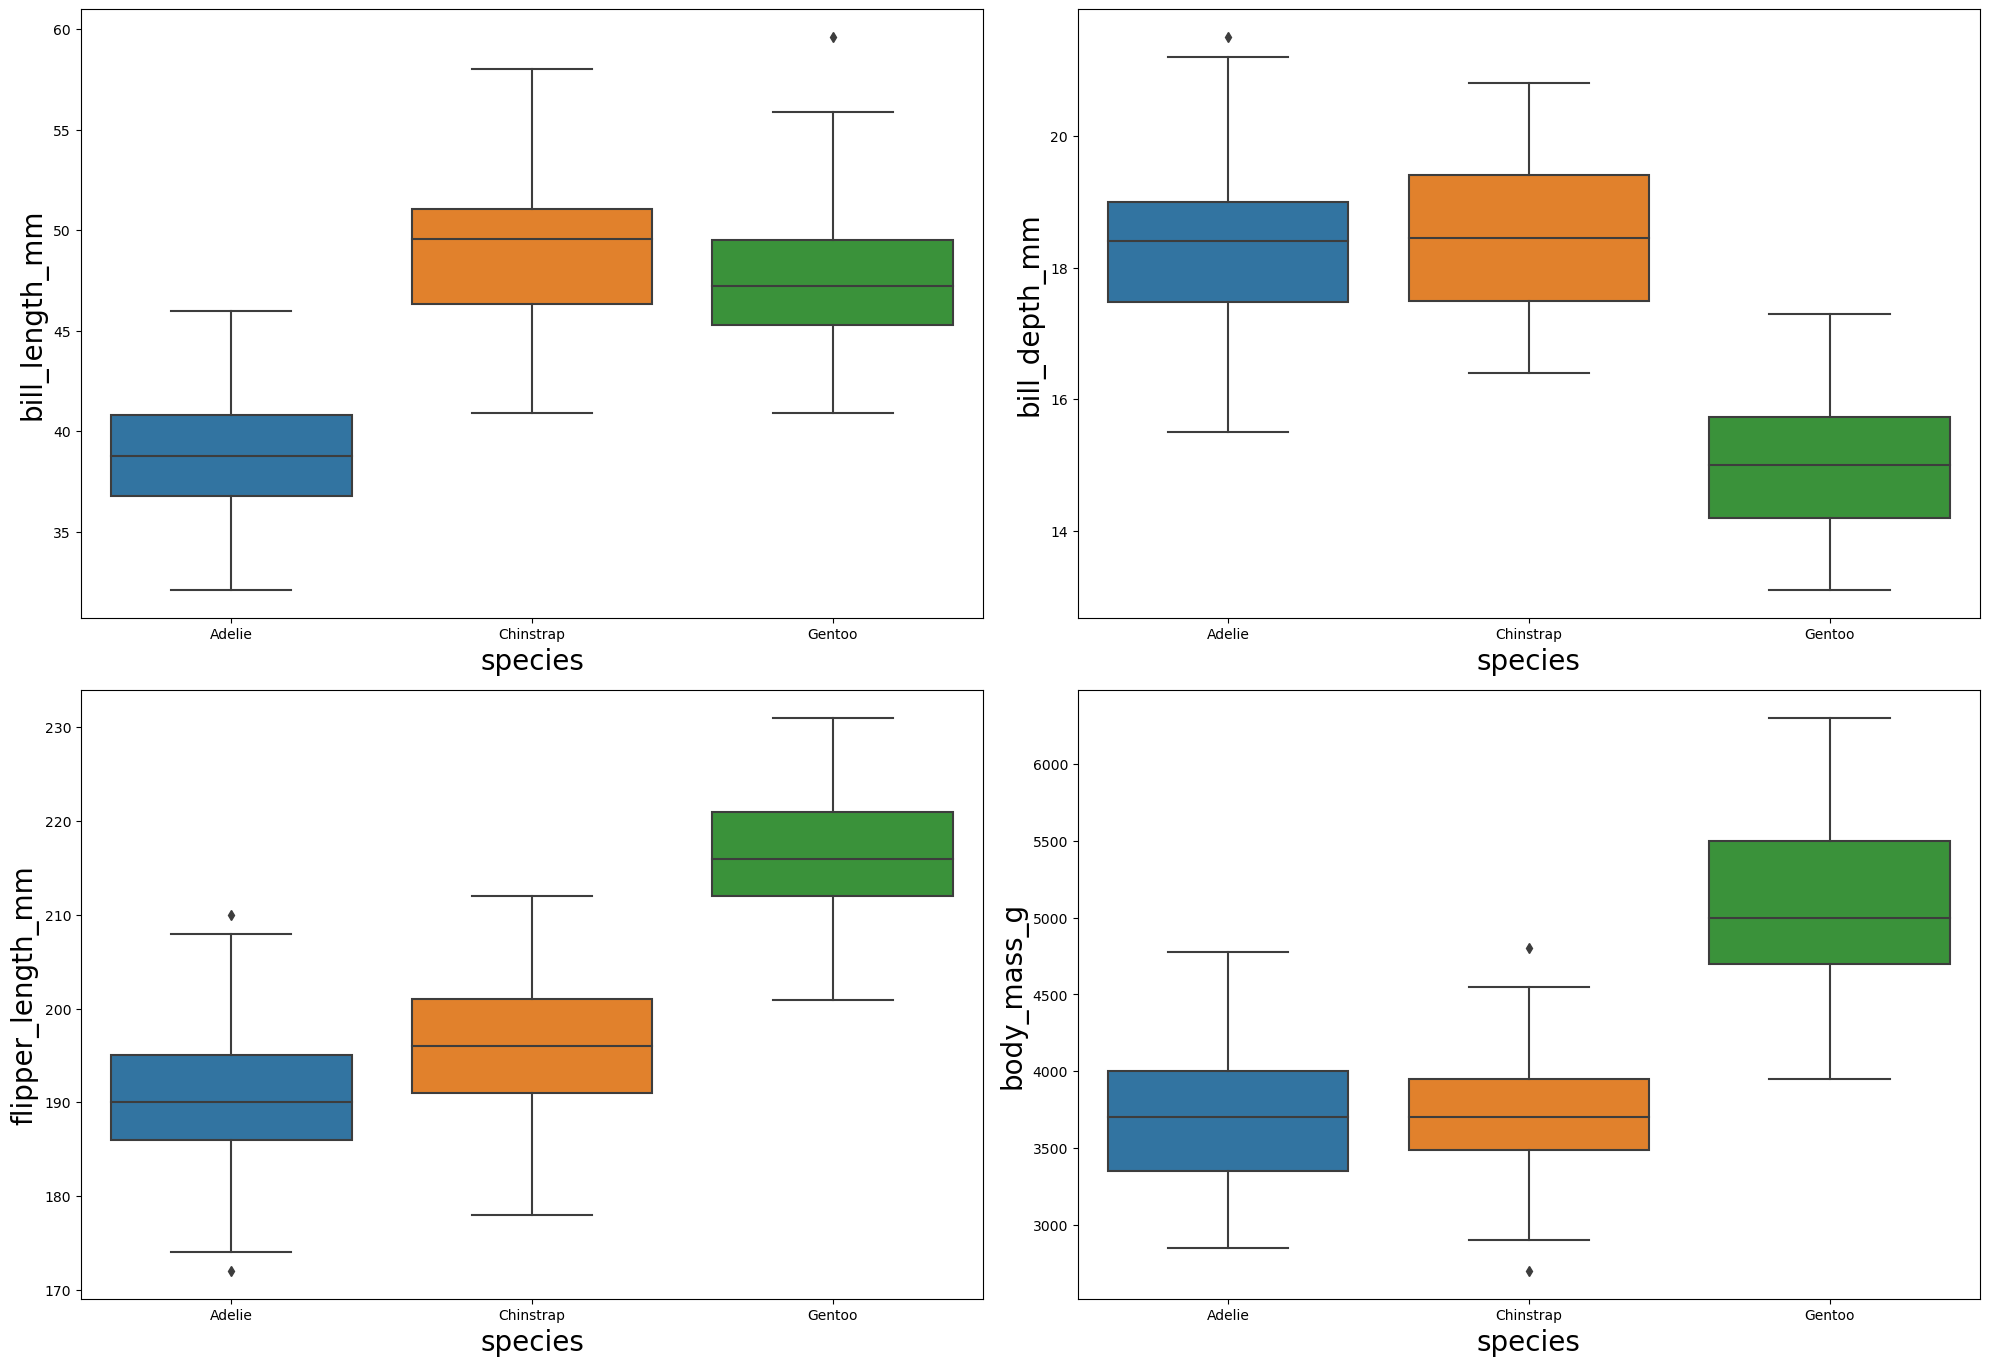

In [146]:
plt.figure(figsize=(20, 20))

num_cols = 2
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=for_viz2, x='species', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('species', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

In [147]:
#Dealing with inconsistent data, we use the describe function
categorical_columns = NewPenguins.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = NewPenguins[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in species: ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in island: ['Torgersen' 'Biscoe' 'Dream']


In [148]:
NewPenguins = pd.get_dummies(NewPenguins, columns=['island'])

In [149]:
X = NewPenguins.drop(["species"], axis=1)
y= NewPenguins["species"].values

In [150]:
from sklearn.preprocessing import LabelEncoder

# Define a label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y)

In [151]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

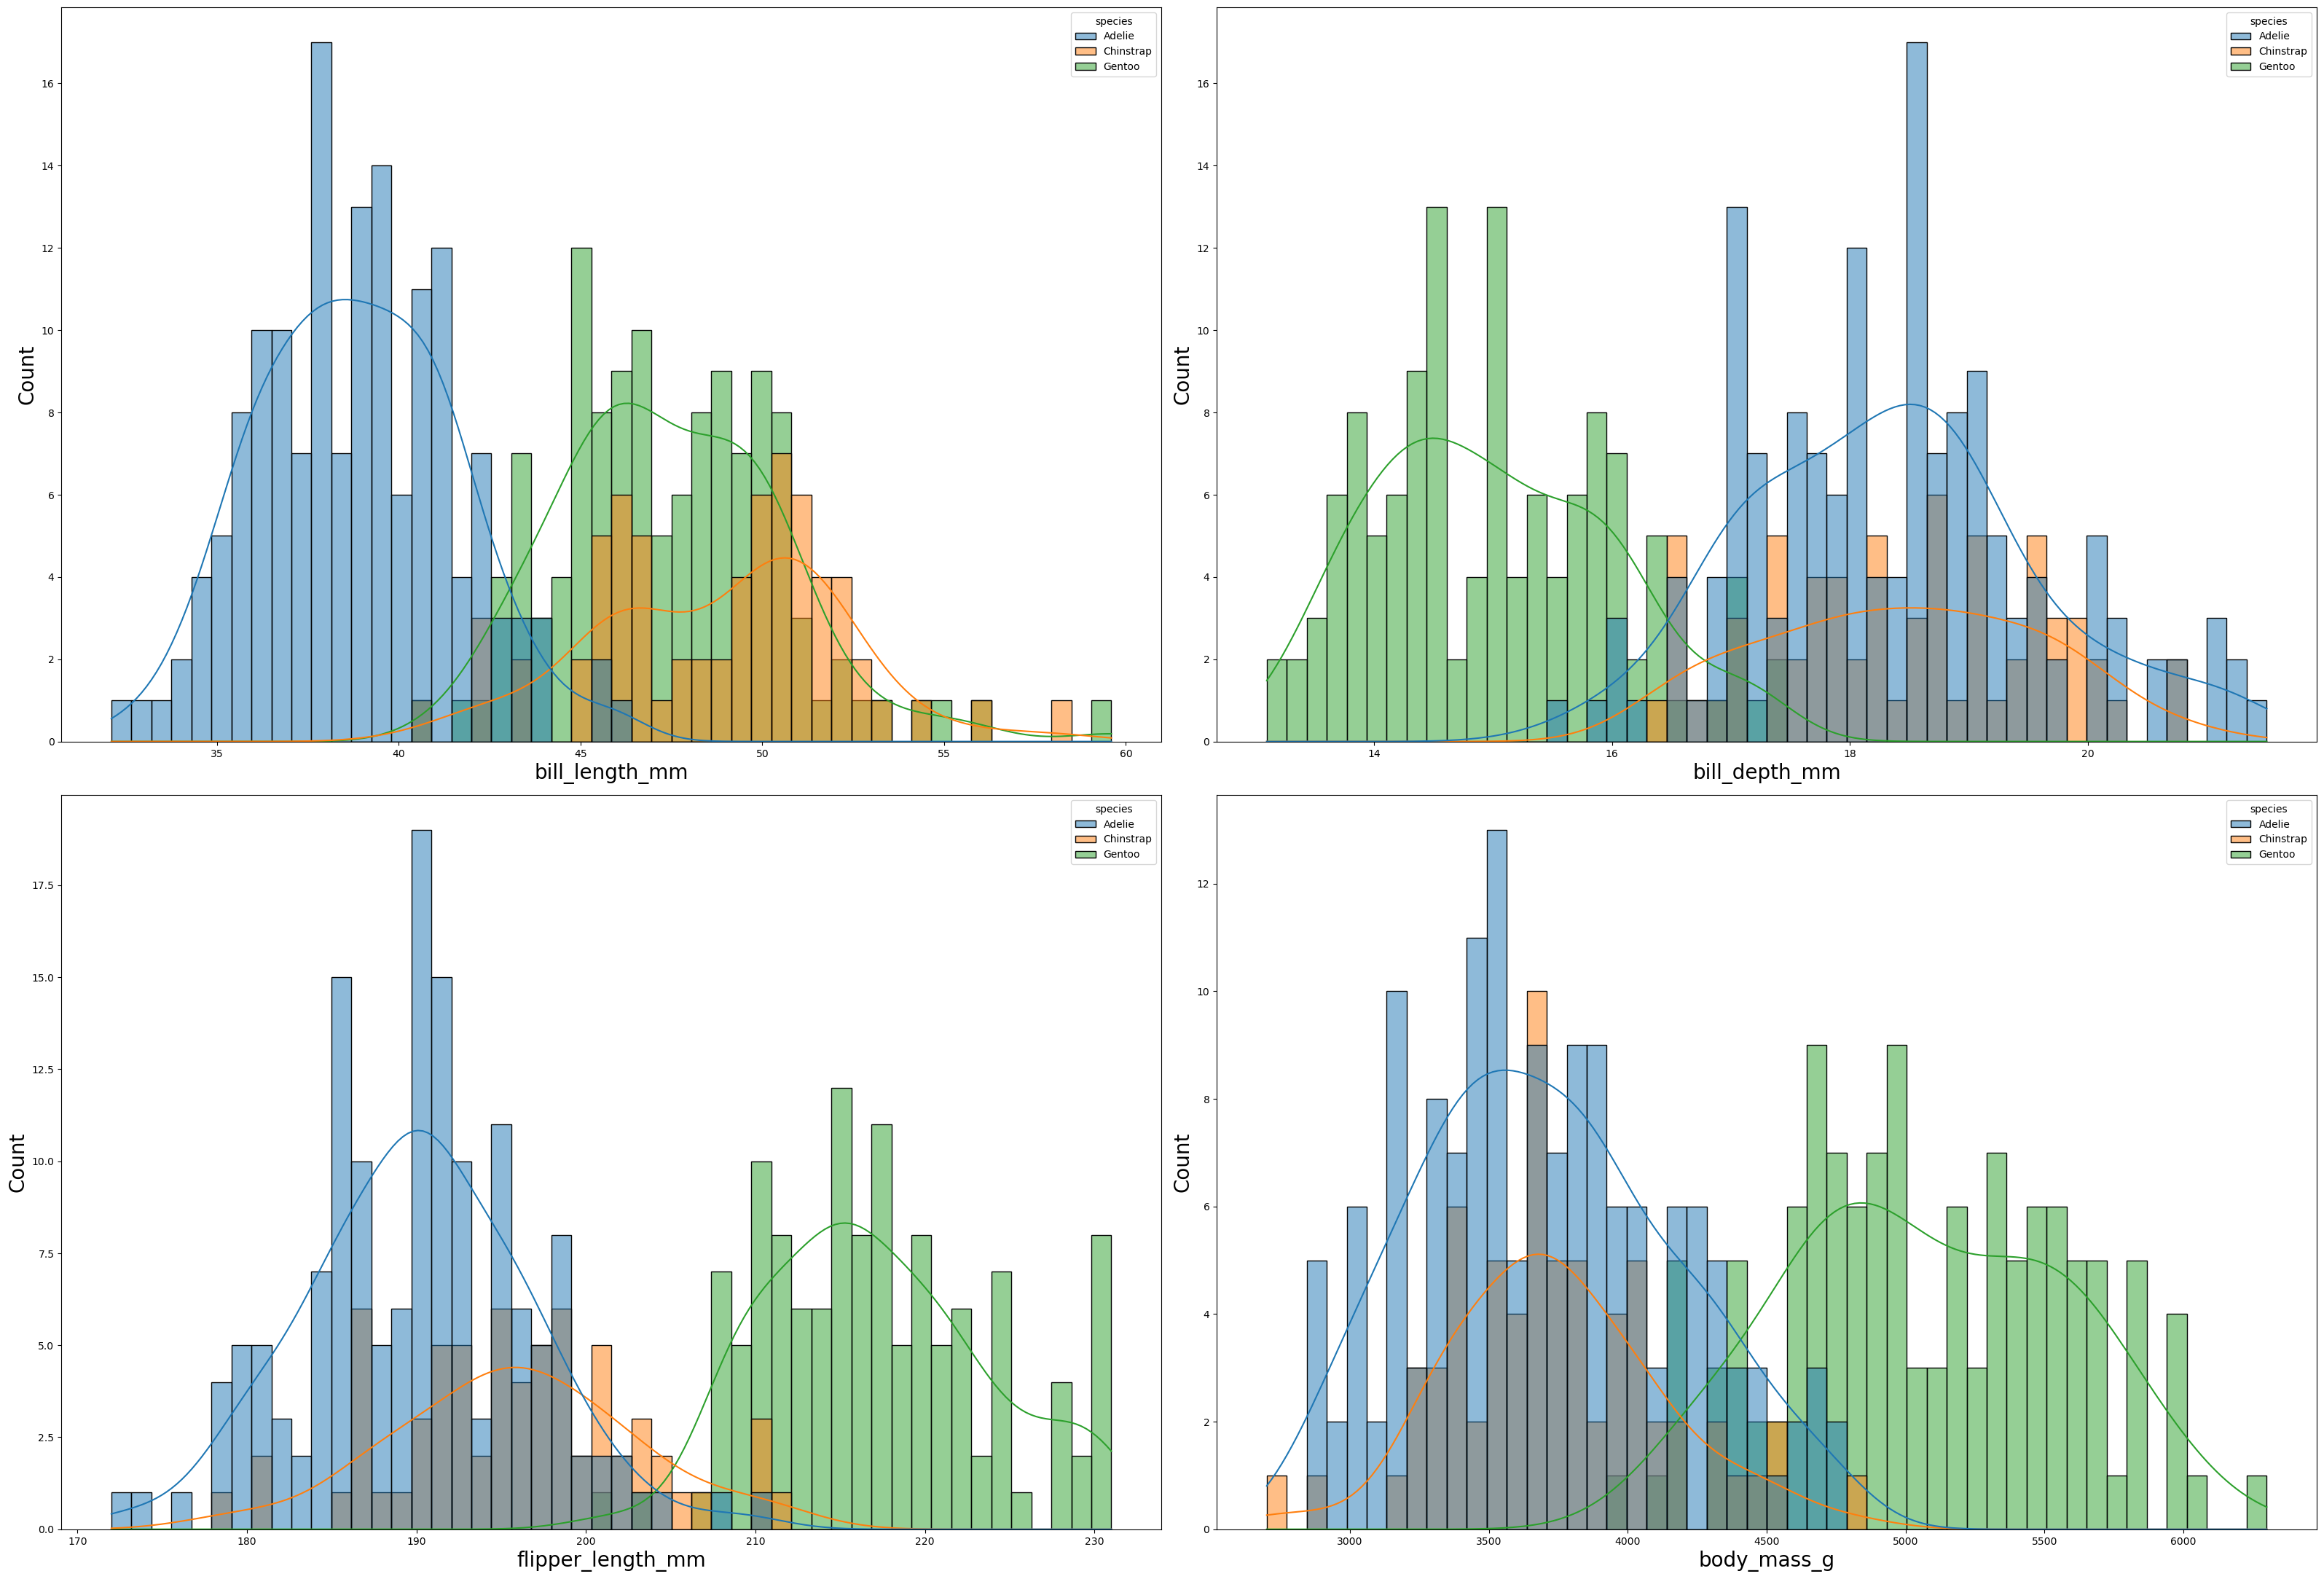

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(32, 32))

num_cols = 2
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(for_viz2, x=col, hue='species', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()


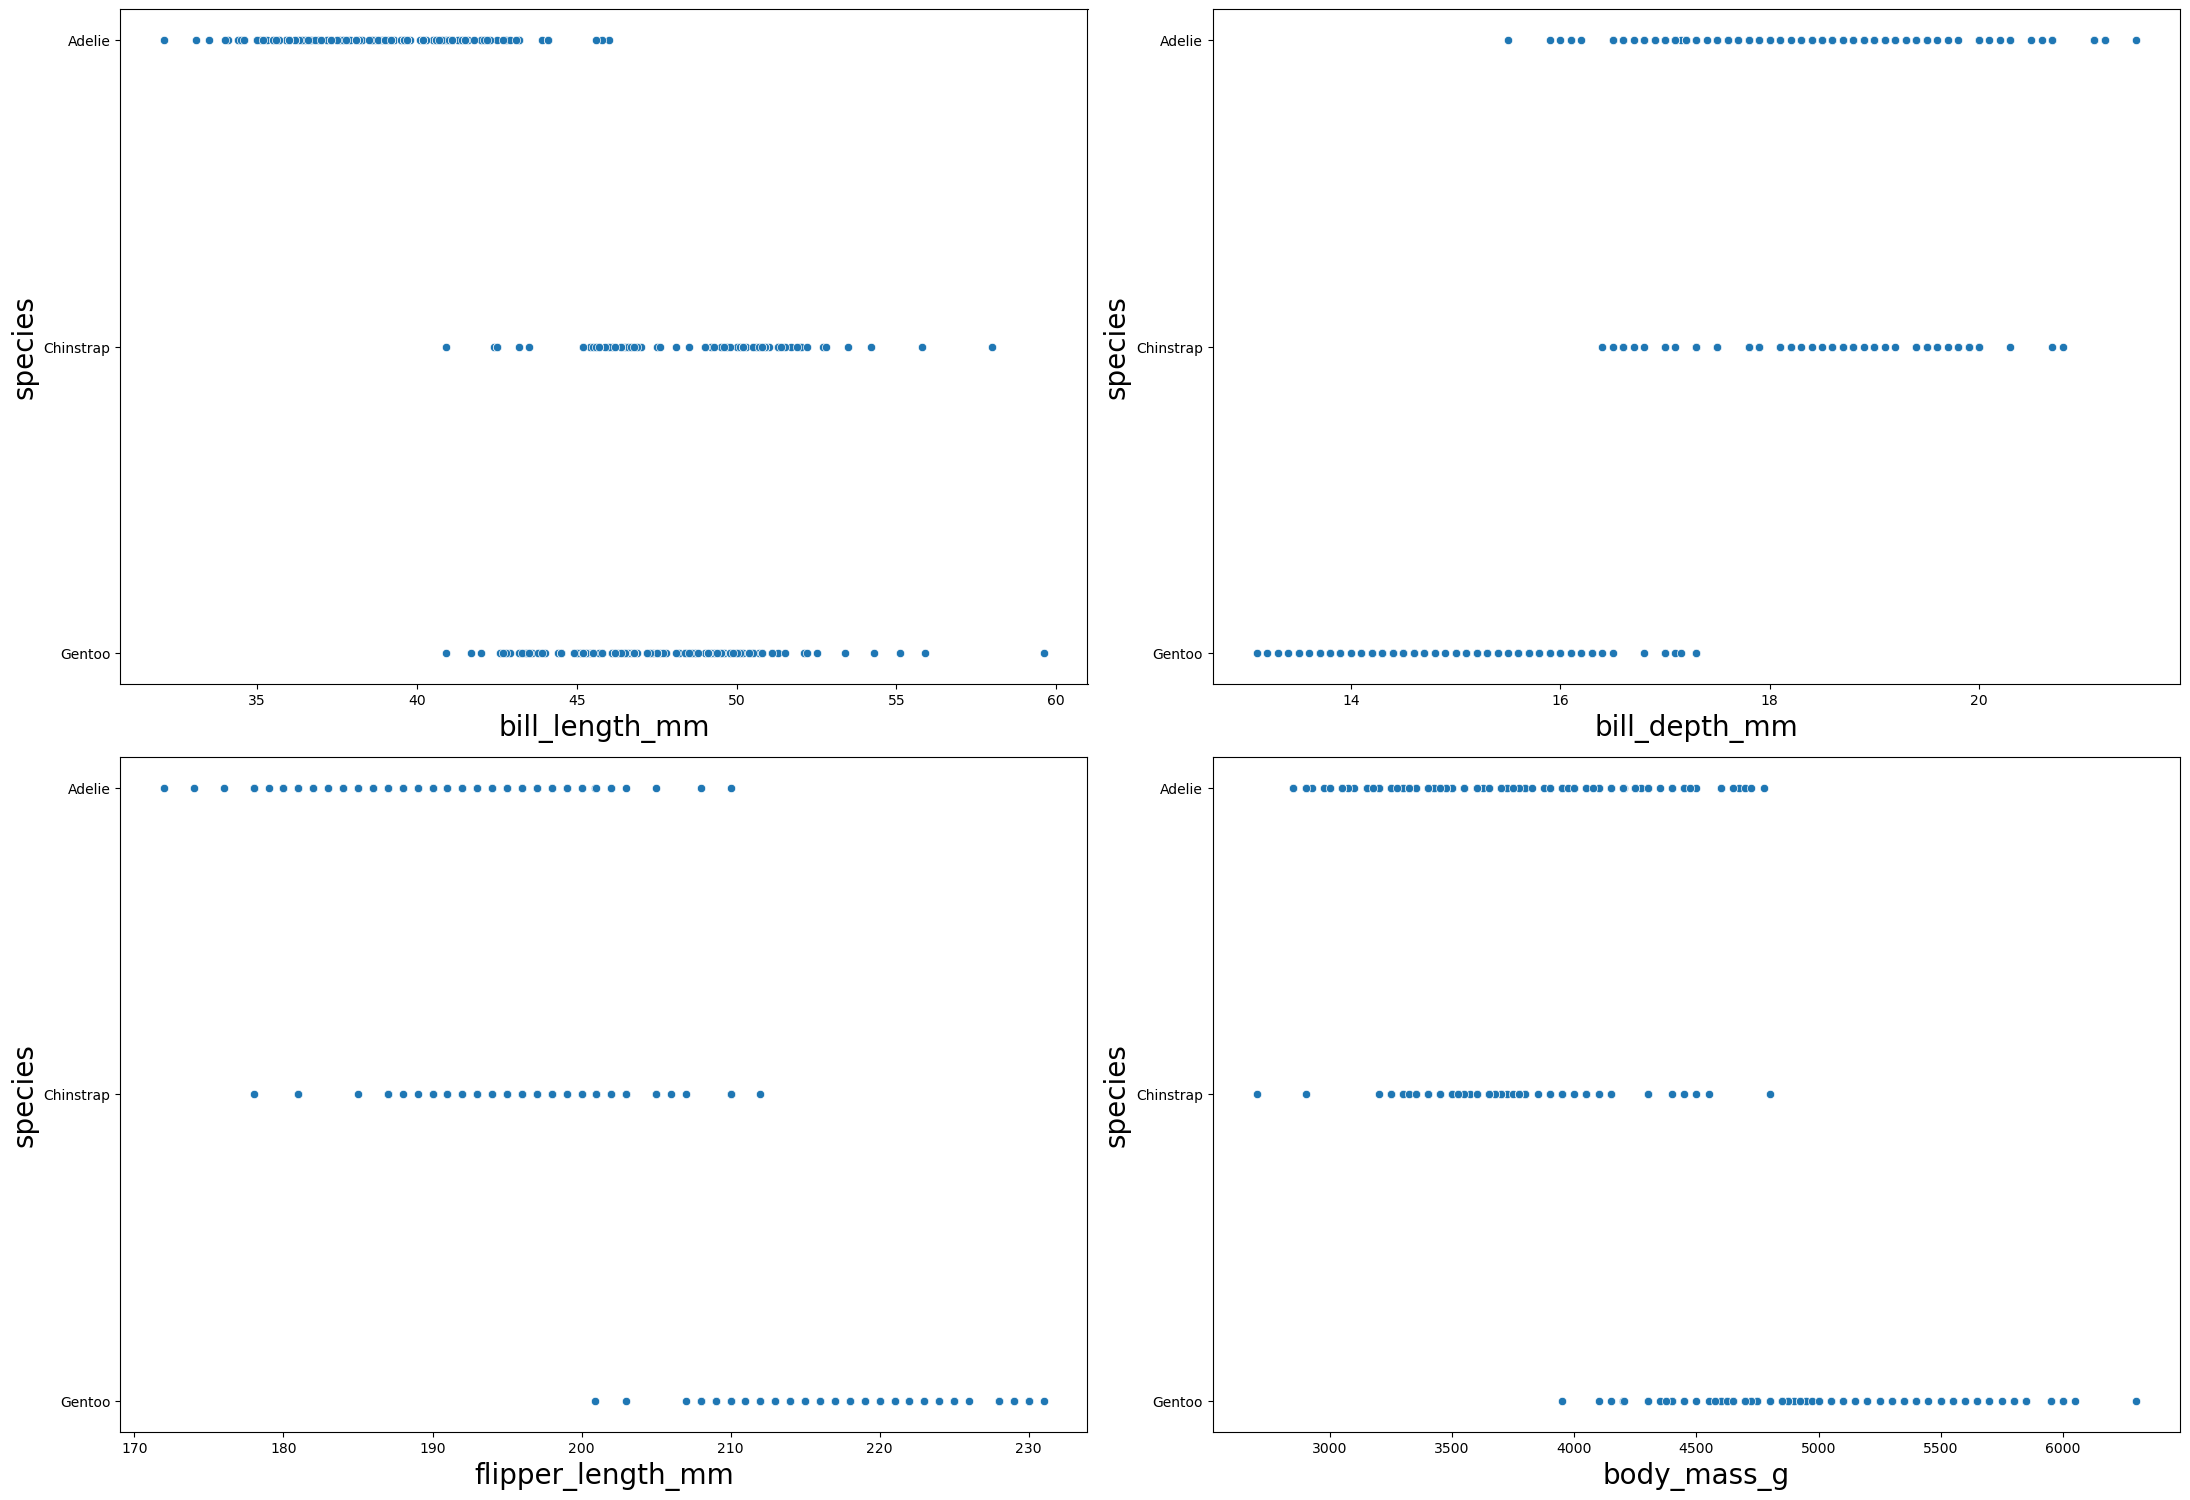

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 22))

num_cols = 2
num_rows = int(for_viz2.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz2.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=for_viz2, x=col, y='species')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('species', fontsize=20)

plt.tight_layout()
plt.show()

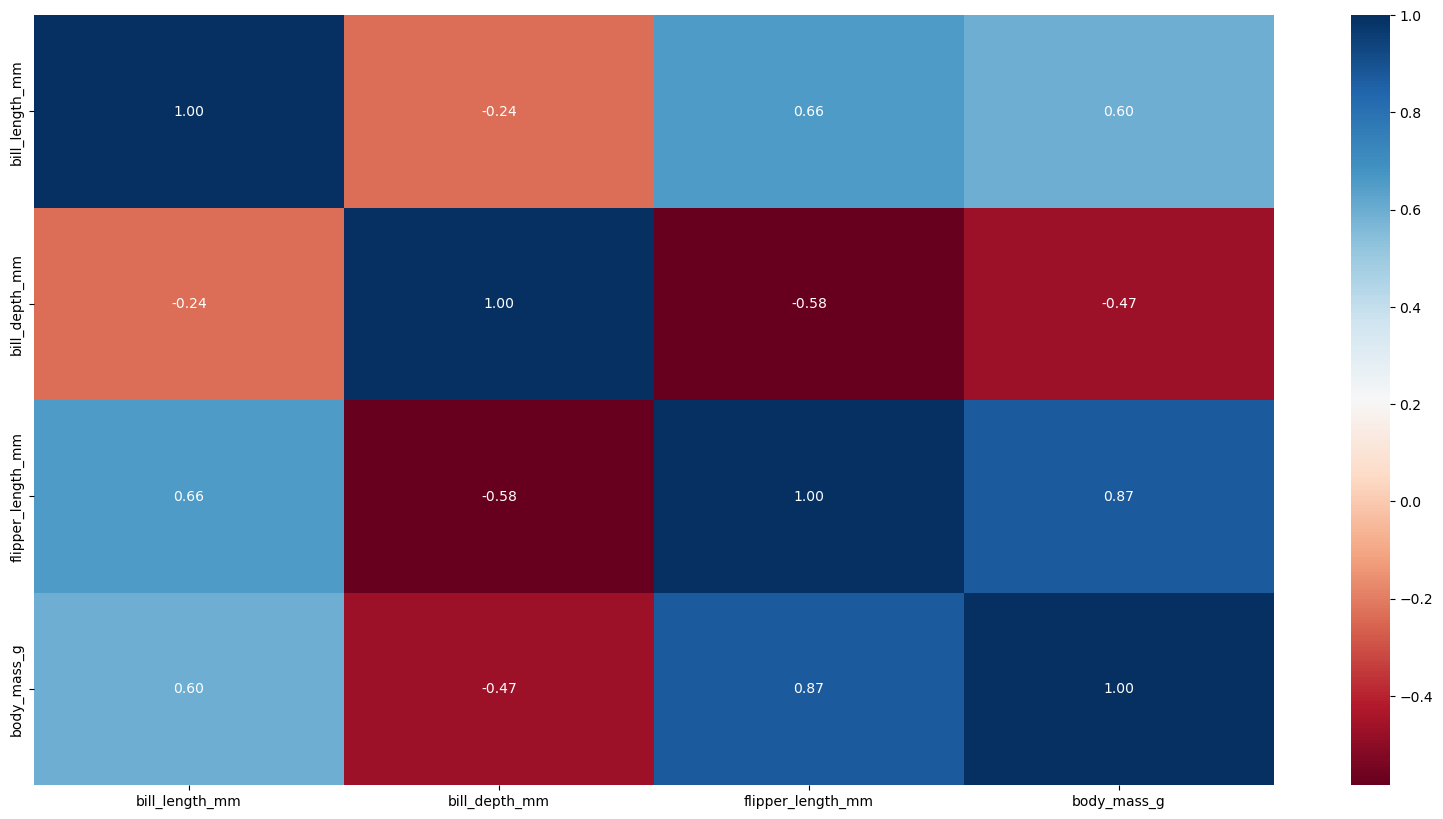

In [160]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(penguins_numerical.corr(), cmap='RdBu', annot=True, fmt=".2f");

### Spliting the data into training and testing sets

In [162]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q2.1. Build a classification model using Decision Trees

In [166]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.65, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.634\nsamples = 275\nvalue = [120, 52, 103]\nclass = 0= Adelie'),
 Text(0.45, 0.75, 'bill_length_mm <= 43.15\ngini = 0.415\nsamples = 166\nvalue = [118.0, 47.0, 1.0]\nclass = 0= Adelie'),
 Text(0.25, 0.5833333333333334, 'bill_length_mm <= 42.4\ngini = 0.05\nsamples = 117\nvalue = [114, 3, 0]\nclass = 0= Adelie'),
 Text(0.15, 0.4166666666666667, 'bill_depth_mm <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]\nclass = 0= Adelie'),
 Text(0.1, 0.25, 'bill_length_mm <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = 0= Adelie'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = 0= Adelie'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1= Chinstrap'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 102\nvalue = [102, 0, 0]\nclass = 0= Adelie'),
 Text(0.35, 0.4166666666666667, 'island_Dream <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4

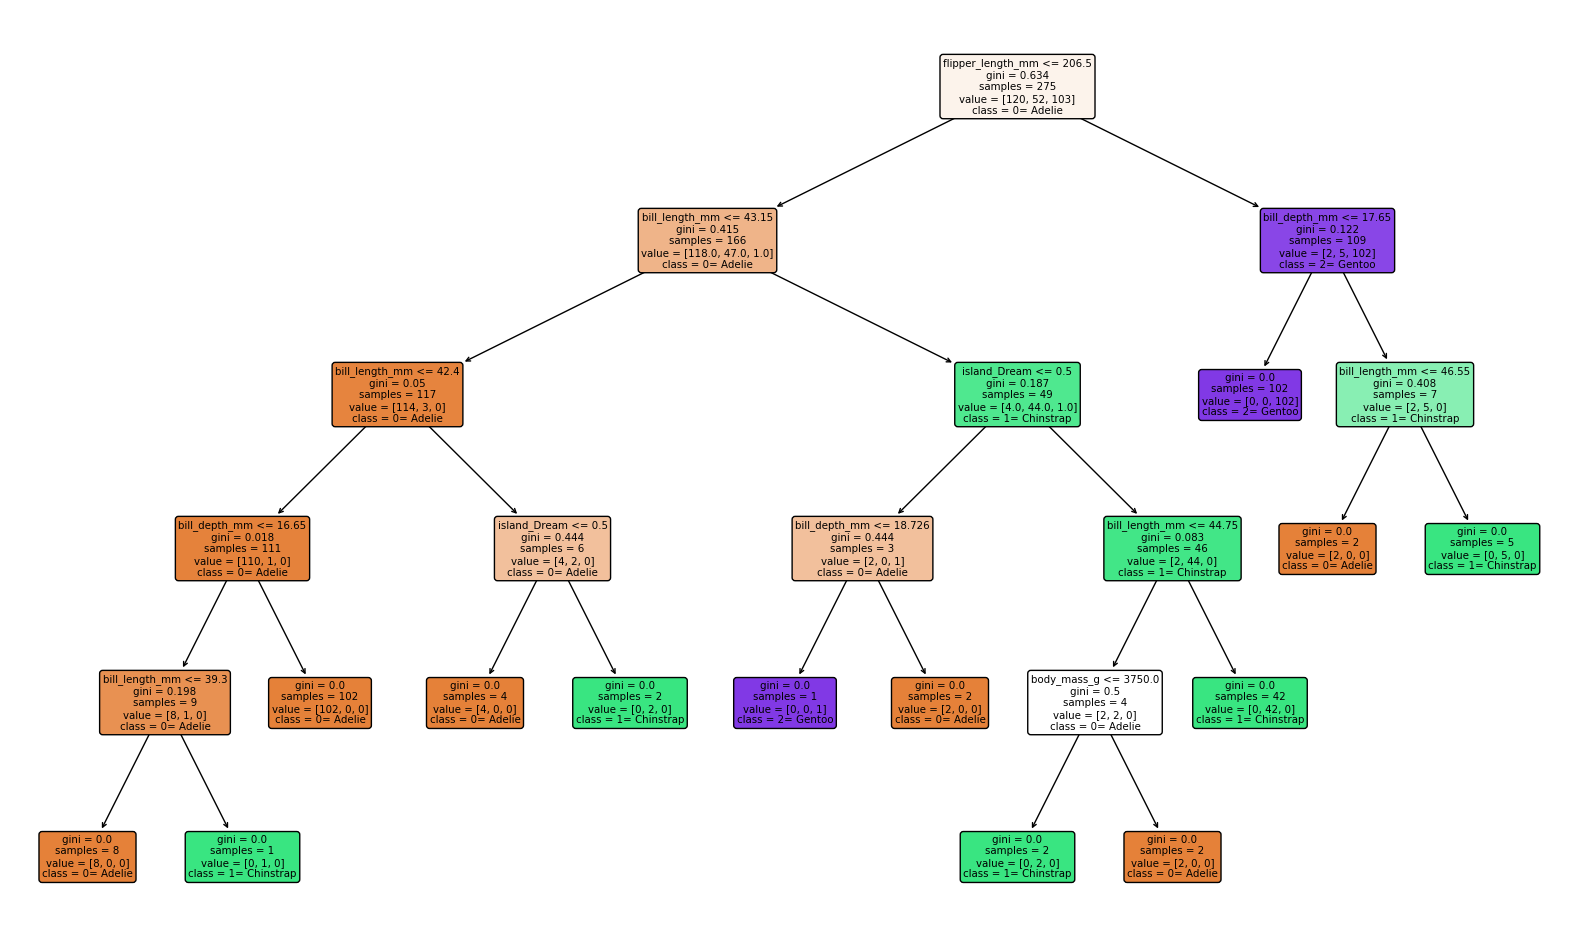

In [167]:
plt.figure(figsize=(20, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0= Adelie", "1= Chinstrap","2= Gentoo"], 
          feature_names=X.columns.tolist())

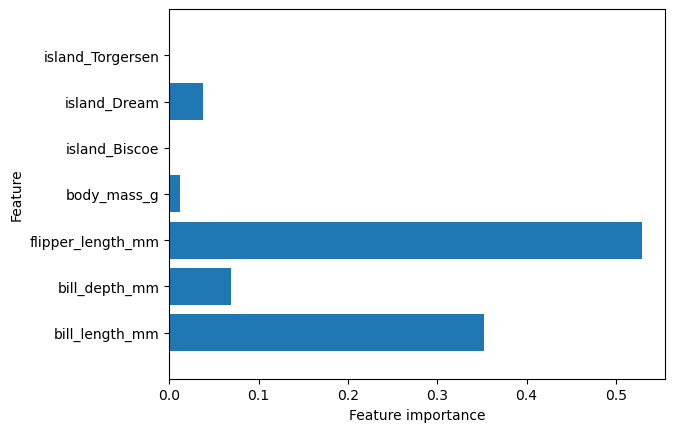

In [168]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

### Q2.2. Evaluate and discuss the model performance

In [170]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

The model's predictions are accurate for roughly 98% of the samples in the test set, according to the accuracy score of 0.98 that has been provided. This implies that, almost 98% of the time, the model accurately predicts the specie.

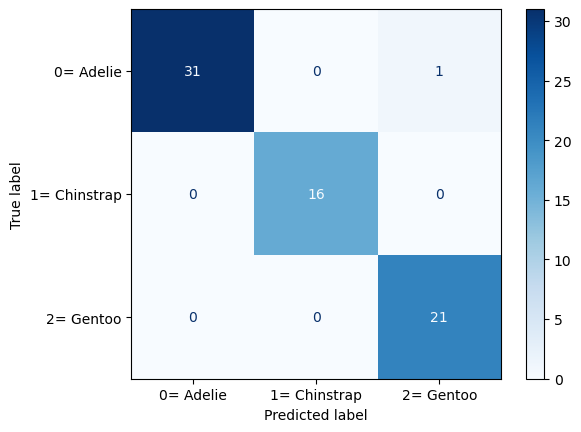

In [173]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0= Adelie", "1= Chinstrap","2= Gentoo"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        16
           2       0.95      1.00      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



From what i noticed, the classification output indicates that the model has high performance across all classes, with precision, recall, and F1-score values close to 1 for most classes. This suggests that the model's predictions align well with the actual labels, resulting in high accuracy. Overall, the model demonstrates excellent performance in classifying the data, with an accuracy of 0.99, indicating that it correctly predicts the target variable for 99% of the samples in the dataset.

### Q2.3. Use Cost Complexity Pruning to prune the decision tree

In [175]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

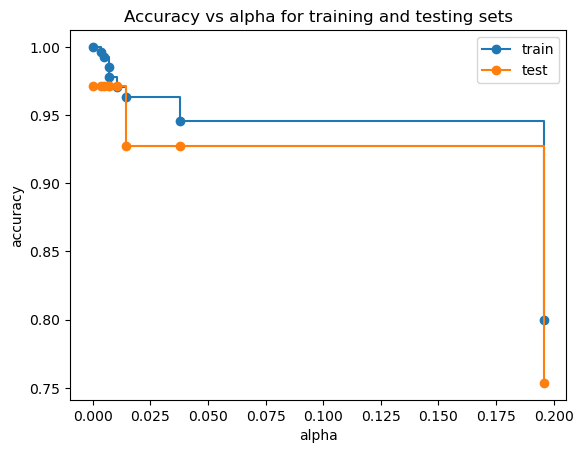

In [176]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

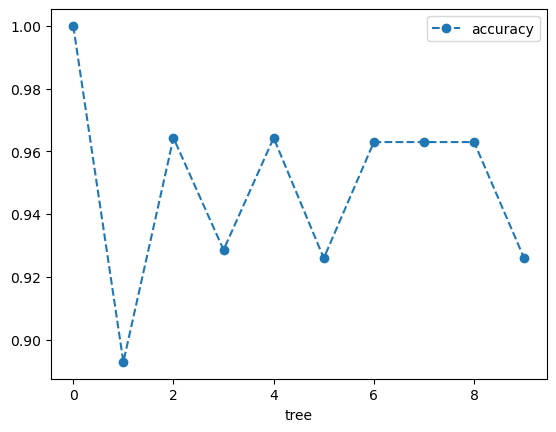

In [177]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

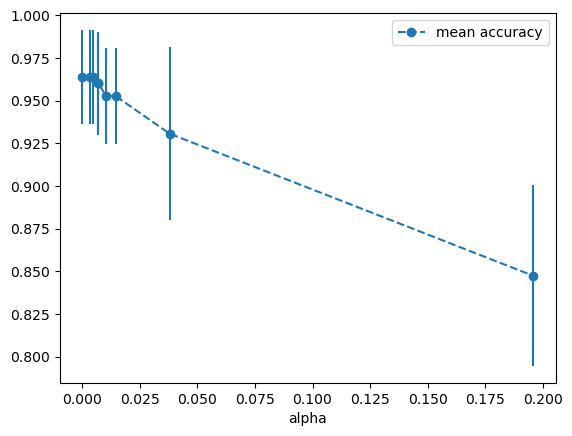

In [178]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [179]:
alpha_results['mean accuracy'].max()

0.9637566137566138

In [180]:
alpha_results['mean accuracy'].idxmax()

0

In [181]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0

In [182]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.65, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.634\nsamples = 275\nvalue = [120, 52, 103]\nclass = 0= Adelie'),
 Text(0.45, 0.75, 'bill_length_mm <= 43.15\ngini = 0.415\nsamples = 166\nvalue = [118.0, 47.0, 1.0]\nclass = 0= Adelie'),
 Text(0.25, 0.5833333333333334, 'bill_length_mm <= 42.4\ngini = 0.05\nsamples = 117\nvalue = [114, 3, 0]\nclass = 0= Adelie'),
 Text(0.15, 0.4166666666666667, 'bill_depth_mm <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]\nclass = 0= Adelie'),
 Text(0.1, 0.25, 'bill_length_mm <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = 0= Adelie'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = 0= Adelie'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1= Chinstrap'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 102\nvalue = [102, 0, 0]\nclass = 0= Adelie'),
 Text(0.35, 0.4166666666666667, 'island_Dream <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4

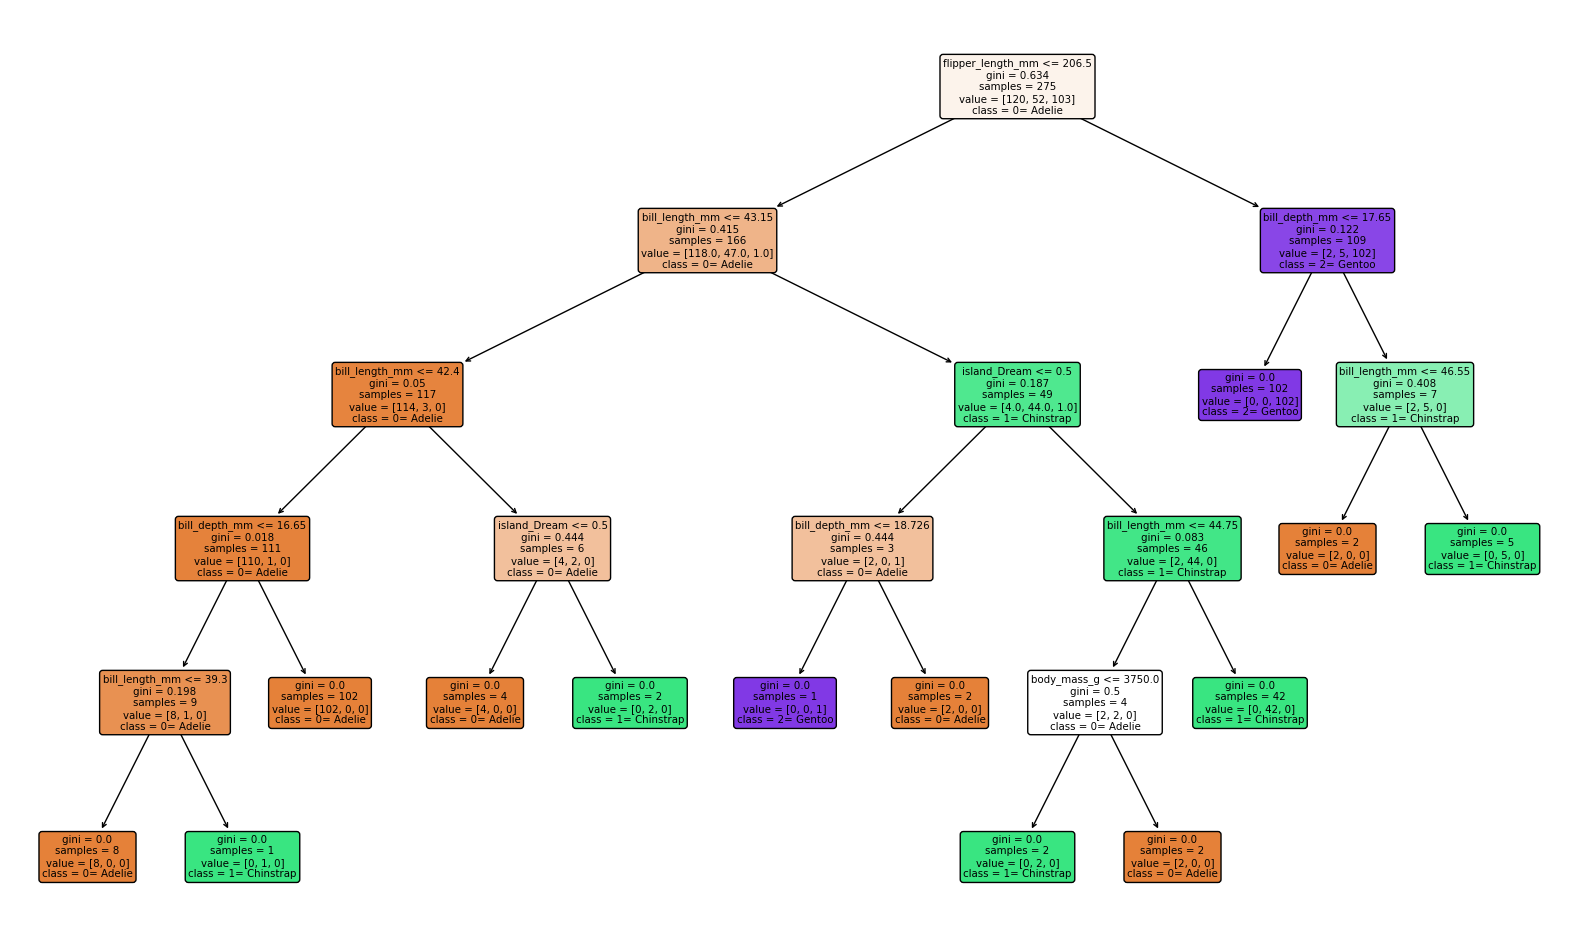

In [183]:
plt.figure(figsize=(20, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0= Adelie", "1= Chinstrap","2= Gentoo"], 
          feature_names=X.columns.tolist())

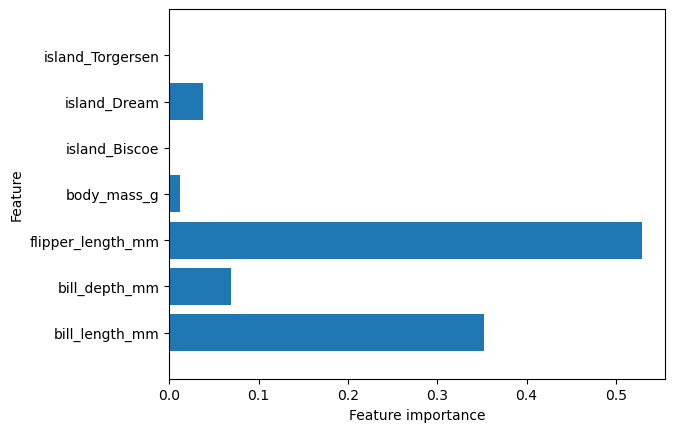

In [184]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

### Q2.4. Evaluate and discuss the model performance after pruning

In [185]:
y_pred = clf_dt.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

After pruning, there isn't really so much difference than before we pruned. We ended up with similar accuracy score

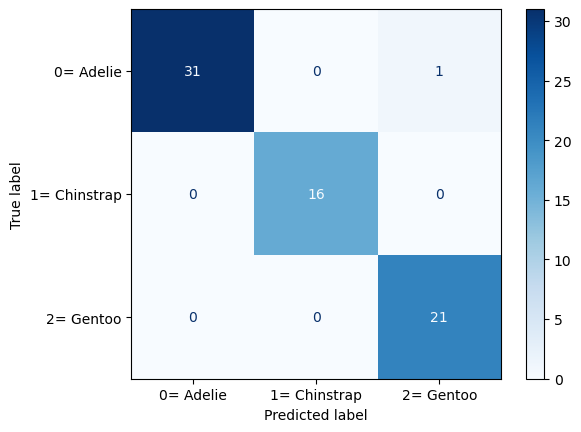

In [187]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0= Adelie", "1= Chinstrap","2= Gentoo"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        16
           2       0.95      1.00      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



Same thing happens also for the classification report. 

### Q2.5. Build a classification model using Random Forests

In [189]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

###  Q2.6. Evaluate and discuss the model performance

In [190]:
y_pred = clf_rf.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

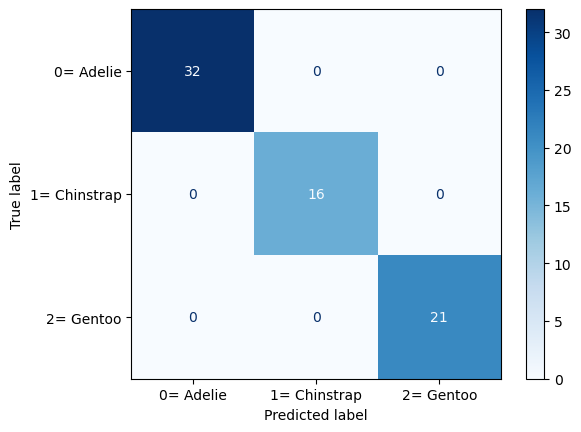

In [193]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm2 = confusion_matrix(y_test, clf_rf.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["0= Adelie", "1= Chinstrap","2= Gentoo"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



From the result above, we see that the model achieved perfect accuracy (1.00) and perfect precision, recall, and F1-score for each class, indicating that it made no errors in classification and correctly identified all instances of each class. This suggests that the model performs exceptionally well on the given dataset.

#### Q2.7. Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab.

So, while all three models exhibit high performance, I think random forest model achieved near-perfect accuracy and flawless classification performance on the test set. The logistic regression model also achieved perfect accuracy but may have limitations in handling more complex datasets compared to tree-based models. 

####  Q2.8. Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

I would pick Random Forest because it achieved perfect accuracy and flawless classification performance on the test set. And also because it leverages ensemble learning to reduce overfitting and improve generalization performance.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

1. Performing this activity was valuable as it allowed me to apply machine learning techniques to real-world datasets. Analyzing the performance of different classification models provided insights into their strengths and weaknesses, helping me understand when and why certain models might be preferred over others.

2. I think that learning to compare and select appropriate machine learning models is crucial for anyone working in data science or machine learning because it enables us practitioners to make informed decisions about model selection, leading to better outcomes in solving real-world problems.  

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab3.ipynb** to the **Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection